# Pandas Demonstration

## Set-up

In [2]:
# community convention, import as "pd"
import pandas as pd

# to imbed plots, prevents pop-up windows for plots
%matplotlib inline

## Data Reading

* Pandas makes it easy to read data from files and even from web sites.
* Here we use the Pandas Datareader module to read Google stock data from 2010 to the end of 2014.

In [3]:
# Reading data from a file
google = pd.read_csv('data/goog.csv', index_col='Date', parse_dates=True)
google

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN
...,...,...,...,...,...
2014-12-24,530.51,531.76,527.02,528.77,704035.0
2014-12-26,528.77,534.25,527.31,534.03,1037727.0
2014-12-29,532.19,535.48,530.01,530.33,2276104.0


## Data Containers

* The `google` object is a Pandas DataFrame container
* standard library python methods like `type()` work on it

In [5]:
type(google)

pandas.core.frame.DataFrame

Inspect the available attributes ("fields") and methods of the DataFrame by using tab-completion:

In [6]:
## To explore the DataFrame contents, uncomment the following:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  194 non-null    float64
dtypes: float64(5)
memory usage: 58.9 KB


## Data Inspection

Use the method `DataFrame.head()` to inspect the first few rows of data:
* great way to inspect smaller data sets
* useful for verifying you've read the right file

In [7]:
# Inspect the first few recods of the DataFrame
google.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN
2010-01-05,313.28,313.61,310.46,311.68,NaN
2010-01-06,312.62,312.62,302.88,303.83,NaN
2010-01-07,304.40,304.70,296.03,296.75,NaN
2010-01-08,295.70,301.32,294.26,300.71,NaN


Now use the Pandas `DataFrame.info()` method to see a bit more detail, including:
* the name of each column
* the Numpy dtype of each column
* how many real values are present
* amount of memory used

*side note: Pandas has excellent support for not-a-number (NaN) entries in DataFrames and Series.*

In [10]:
# What data do we have
# Weekends and holidays are not included
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 5 columns):
Open      1257 non-null float64
High      1257 non-null float64
Low       1257 non-null float64
Close     1257 non-null float64
Volume    194 non-null float64
dtypes: float64(5)
memory usage: 58.9 KB


## Data Indexing

* Pandas DataFrames have a special Index, goes beyond integer indexing
* Pandas DataFrames are indexed by column label, then (row) Index:

In [11]:
# Access an entire column using []
google['Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
2010-01-11    301.93
2010-01-12    298.74
2010-01-13    287.96
2010-01-14    291.66
2010-01-15    295.50
2010-01-19    290.45
2010-01-20    292.70
2010-01-21    291.43
2010-01-22    281.97
2010-01-25    273.02
2010-01-26    268.72
2010-01-27    270.36
2010-01-28    271.97
2010-01-29    268.98
2010-02-01    267.03
2010-02-02    267.21
2010-02-03    264.07
2010-02-04    268.23
2010-02-05    263.94
2010-02-08    265.98
2010-02-09    269.50
2010-02-10    266.77
2010-02-11    265.86
2010-02-12    266.22
2010-02-16    268.30
               ...  
2014-11-18    537.50
2014-11-19    535.00
2014-11-20    531.25
2014-11-21    541.61
2014-11-24    537.65
2014-11-25    539.00
2014-11-26    540.88
2014-11-28    540.62
2014-12-01    538.90
2014-12-02    533.51
2014-12-03    531.44
2014-12-04    531.16
2014-12-05    531.00
2014-12-08    527.13
2014-12-09    522.14
2014-12-10    533.08
2014-12-

In [8]:
# Inspect the first 5 rows or the 'Open' column, using integer indexing

google['Open'].iloc[0:5]

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
Name: Open, dtype: float64

In [13]:
# Inspect the first 5 rows or the 'Open' column, using date indexing

google.loc['2010-01-04':'2010-01-10','Open']

Date
2010-01-04    313.16
2010-01-05    313.28
2010-01-06    312.62
2010-01-07    304.40
2010-01-08    295.70
Name: Open, dtype: float64

## Data Filtering

In [9]:
# Filtering by conditional
google_up = google[ google['Close'] > google['Open'] ]
google_up.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,295.70,301.32,294.26,300.71,NaN
2010-01-13,287.96,293.90,286.66,293.25,NaN
2010-01-14,291.66,296.80,291.11,294.63,NaN
2010-01-19,290.45,294.91,287.86,293.52,NaN
2010-01-26,268.72,274.53,267.88,270.94,NaN


In [10]:
# Filtering out missing data

google_filtered = google[pd.isnull(google['Volume']) == False ]
google_filtered.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,564.86,565.40,550.50,556.58,3826676.0
2014-03-28,558.94,566.03,558.33,559.51,2258918.0
2014-03-31,564.63,566.93,555.87,556.70,1942277.0
2014-04-01,559.57,568.18,558.44,566.88,2182626.0
2014-04-02,282.43,571.83,561.44,566.98,2088804.0


## Data Statistics

In Pandas we can very easily perform many types of statistical operations. 

In [11]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.940000e+02
mean,375.275593,378.450247,372.132474,375.327064,1.937264e+06
std,115.684354,116.288827,114.935742,115.664301,9.842775e+05
min,218.940000,220.920000,216.600000,217.820000,7.040350e+05
25%,285.790000,288.760000,283.060000,285.450000,1.338451e+06
50%,318.330000,320.800000,315.180000,317.260000,1.684634e+06
75%,452.540000,456.020000,449.740000,452.830000,2.164369e+06
max,612.790000,613.830000,608.690000,609.470000,6.795393e+06


## Data Computations

One simple example motivated by finance is to compute the "volatility" -- the rolling standard deviation of the log-return over the business days of the year.
* First we use the `pandas` method `.pct_change()` to compute the *return* per day based on percent change.
* Next we use `numpy` to compute the log of the return.
* Finally we use `pandas` method `.rolling_std()` to compute the volatility

In [12]:
# Compute the returns from daily percent change
# Append a new column
google['Return'] = google['Close'].pct_change()
google['Return'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004408
2010-01-06   -0.025186
2010-01-07   -0.023303
2010-01-08    0.013345
Name: Return, dtype: float64

In [13]:
# Compute the log() of the return using numpy
# Append another new column
import numpy as np
google['LogReturn'] = np.log(1+google['Return'])
google['LogReturn'].iloc[0:5]

Date
2010-01-04         NaN
2010-01-05   -0.004418
2010-01-06   -0.025509
2010-01-07   -0.023578
2010-01-08    0.013256
Name: LogReturn, dtype: float64

In [16]:
# Compute volatility as rolling standard deviation of the log() of the returns
# Append yet another new column
window_size = 252
google['Volatility'] = google['LogReturn'].rolling(window_size).std() * np.sqrt(window_size)
google['Volatility'].iloc[window_size-5:window_size+5]

Date
2010-12-28         NaN
2010-12-29         NaN
2010-12-30         NaN
2010-12-31         NaN
2011-01-03         NaN
2011-01-04    0.278561
2011-01-05    0.278770
2011-01-06    0.277694
2011-01-07    0.276720
2011-01-10    0.276432
Name: Volatility, dtype: float64

## Data Visualization

Finally, Pandas is coupled to Matplotlib:
* Columns from a single DataFrame can be plotted using `DataFrame.plot()`.
* Here we will plot the newly created columns of data, `LogReturn` and `Volatility`.

In [17]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2010-01-04 to 2014-12-31
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1257 non-null   float64
 1   High        1257 non-null   float64
 2   Low         1257 non-null   float64
 3   Close       1257 non-null   float64
 4   Volume      194 non-null    float64
 5   Return      1256 non-null   float64
 6   LogReturn   1256 non-null   float64
 7   Volatility  1005 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88c403eee0>,
      dtype=object)

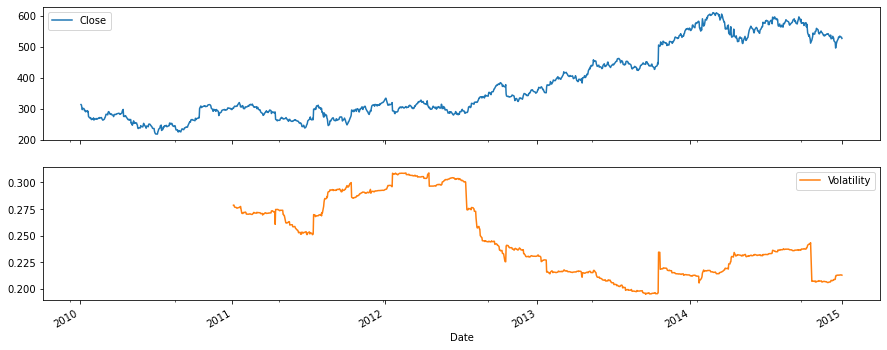

In [18]:
google[['Close','Volatility']].plot(subplots=True, figsize=(15,6))

## Set-up

In [40]:
# Numerical computing
import numpy as np

# Draw pictures!
import matplotlib.pyplot as plt
%matplotlib inline

# Python people are weird!
import pandas as pd

# Set Jupyter notebook display options
pd.options.display.max_rows = 8
pd.options.display.max_columns = 8

# Check version number
pd.__version__

'1.0.5'

## Creating a Series

In [19]:
# Example: Creating a Series from a data column from file

file   = "data/exoplanets.csv"
data   = pd.read_csv(file)
series = data['NAME']

print( "\n" )
print( series )

print( "\n" )
print( type( series ) )



0          gamma Cep b
1          HD 114762 b
2       PSR B1257+12 B
3       PSR B1257+12 A
4           beta Gem b
             ...      
1637         HD 5319 c
1638         WASP-89 b
1639         HD 1666 b
1640        HD 95127 b
1641      Kepler-432 c
Name: NAME, Length: 1642, dtype: object


<class 'pandas.core.series.Series'>


In [20]:
# Example: Creating a Series a list

new_list = [5,10,15,20,25]
pd.Series(new_list)

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [21]:
# Example: Creating a Series from a dictionary... index will be sorted

new_dictionary = {'b': 100, 'a': 200.0, 'd':450, 'c':700}
pd.Series(new_dictionary)

b    100.0
a    200.0
d    450.0
c    700.0
dtype: float64

In [32]:
# Example: Creating a Series from an ORDERED dictionary
#          ... to preserver order of the indices.

from collections import OrderedDict
od = OrderedDict([('b',200),('a', 100), ('d',450), ('c',700)])
pd.Series(od)

b    200
a    100
d    450
c    700
dtype: int64

In [23]:
# Example: Creating a Series from a NumPy array

array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

print( "\n" )
print( array1 )
print( type(array1) )

print( "\n" )
print( series1 )
print( type(series1) )



[10. 20. 30. 40. 50.]
<class 'numpy.ndarray'>


0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
<class 'pandas.core.series.Series'>


## Pandas Index

The pandas Series data structure always has an `Index`

In [24]:
# The default Index is just a sequence of integers:
array1  = np.arange(1,6)*10.0
series1 = pd.Series(array1)

series1.index

RangeIndex(start=0, stop=5, step=1)

In [25]:
# The Index is used for indexing

print( series1.iloc[0] )  # "Positional" indexing

10.0


In [26]:
# The Index can be set to a sequence of labels:

index2 = ['a','b','c','d','a']
series2 = pd.Series(np.arange(1,6)*10.0, index=index2)

In [27]:
# The Index labels are used for indexing

series2.loc['b']  # "label" indexing

20.0

In [28]:
# Indexing when the label is not unique?

series2.loc['a']

a    10.0
a    50.0
dtype: float64

## Iterating over a Series

In [29]:
for key, value in series2.iteritems():
    print(key, value)

a 10.0
b 20.0
c 30.0
d 40.0
a 50.0


## Pandas Slicing

In [30]:
# Positional indexing and slicing

series1.iloc[1:3]

1    20.0
2    30.0
dtype: float64

In [31]:
# Be careful when slicing with integers versus labels

print( series2.iloc[1:2]     )  # Positional indexing is permitted with slicing
print("\n")
print( series2.loc['b':'c'] )  # Ranges of labels can be sliced (slicing here is *inclusive*)

b    20.0
dtype: float64


b    20.0
c    30.0
dtype: float64


In [33]:
# Example: slice from the end
series2.iloc[-1:]

a    50.0
dtype: float64

In [34]:
# Example: slice from the beginning
series2.iloc[:-3]

a    10.0
b    20.0
dtype: float64

In [35]:
# Example: slice with labels, but with integer step size
series2.loc['d':'b':-2]

d    40.0
b    20.0
dtype: float64

## Series Arithmetic

In [36]:
# Arithmetic with Series is as with numpy arrays
print(series1)

series2 = series1 * 2 
print(series2)

series3 = series2 * 3
print(series3)

0    10.0
1    20.0
2    30.0
3    40.0
4    50.0
dtype: float64
0     20.0
1     40.0
2     60.0
3     80.0
4    100.0
dtype: float64
0     60.0
1    120.0
2    180.0
3    240.0
4    300.0
dtype: float64


## Series with NumPy

In [37]:
# numpy ufuncs can be applied elementwise to Series

series_2pi = pd.Series( np.linspace(-1*np.pi, +1*np.pi, 100) )
series_2pi

0    -3.141593
1    -3.078126
2    -3.014660
3    -2.951193
4    -2.887727
        ...   
95    2.887727
96    2.951193
97    3.014660
98    3.078126
99    3.141593
Length: 100, dtype: float64

In [38]:
# Even though pandas was built on numpy, numpy methods on Series return a Series

series_sin = np.sin( series_2pi )
print( series_sin )
print( type( series_sin ) )

0    -1.224647e-16
1    -6.342392e-02
2    -1.265925e-01
3    -1.892512e-01
4    -2.511480e-01
          ...     
95    2.511480e-01
96    1.892512e-01
97    1.265925e-01
98    6.342392e-02
99    1.224647e-16
Length: 100, dtype: float64
<class 'pandas.core.series.Series'>


## Series with Matplotlib

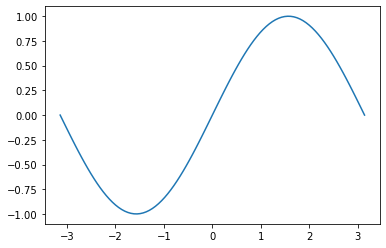

In [41]:
plt.plot(series_2pi, series_sin)

## Series Operations

In [42]:
# You can add two series

series1 = pd.Series([1,2,3,4,5])
print(series1)

series2 = pd.Series([10,20,30,40,50])
print(series2)

series3 = series1 + series2
print(series3)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    10
1    20
2    30
3    40
4    50
dtype: int64
0    11
1    22
2    33
3    44
4    55
dtype: int64


In [46]:
# Even better when you assign labels to your data!
# default outer join

series1 = pd.Series([1,2,3,4,5],      index=['a','b','c','d','e'])
series2 = pd.Series([10,20,30,40,50], index=['c','d','e','f','g'])

print( series1 + series2 )

a     NaN
b     NaN
c    13.0
d    24.0
e    35.0
f     NaN
g     NaN
dtype: float64


In [47]:
# So when you apply a method like mean(), the NaNs are handled intelligently...

(series1 + series2).mean()

24.0

In [48]:
# Contrast how NumPy and Pandas handle NaN:

print( "Pandas mean: ", pd.Series( [1.0, 2.0, np.nan] ).mean() )
print( "Numpy mean:  ", np.array(  [1.0, 2.0, np.nan] ).mean() )

Pandas mean:  1.5
Numpy mean:   nan


## Creating a DataFrame

In [49]:
# Creating a DataFrame from a file read:

file    = "data/exoplanets.csv"
df_file = pd.read_csv(file)
df_file

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
3,PSR B1257+12 A,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,1992,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1638,WASP-89 b,Hellier 2015,http://adsabs.harvard.edu/abs/2015AJ....150...18H,2015,...,20:55:35.98,-18:58:16.1,0.920000,0.880000
1639,HD 1666 b,Harakawa 2015,http://adsabs.harvard.edu/abs/2015ApJ...806....5H,2015,...,+00:20:52.34,-19:55:51.89,1.500000,1.930000
1640,HD 95127 b,Niedzielski 2015,http://adsabs.harvard.edu/abs/2015ApJ...803....1N,2015,...,+10:59:35.10,+43:48:52.17,1.200000,20.000000
1641,Kepler-432 c,Ciceri 2015,http://adsabs.harvard.edu/abs/2015A%26A...573L...,2015,...,19:33:07.729,+48:17:09.,1.320000,4.060000


In [50]:
# Creating a DataFrame from a dictionary

dictionary = {'a':[1,2,3,4,5,6,7,8,9,10],
              'b':np.linspace(0,np.pi,10),
              'c':0.0,
              'd':["a","b","c","a","b","c","a","b","c","a"]}

df_dict = pd.DataFrame(dictionary)
df_dict

,a,b,c,d
0,1,0.000000,0.0,a
1,2,0.349066,0.0,b
2,3,0.698132,0.0,c
3,4,1.047198,0.0,a
...,...,...,...,...
6,7,2.094395,0.0,a
7,8,2.443461,0.0,b
8,9,2.792527,0.0,c
9,10,3.141593,0.0,a


In [51]:
# Inspect the DataFrame colums and index
df_dict.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [52]:
df_dict.index

RangeIndex(start=0, stop=10, step=1)

Now use the Pandas `DataFrame.info()` method to see a bit more detail, including:
* the name of each column
* the Numpy dtype of each column
* how many actual values are present
* amount of memory used

*side note: Pandas has excellent support for not-a-number (NaN) entries in DataFrames and Series.*

In [53]:
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10 non-null     int64  
 1   b       10 non-null     float64
 2   c       10 non-null     float64
 3   d       10 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


## DataFrame Indexing

* Pandas DataFrames have a special Index, goes beyond integer indexing
* Pandas DataFrames are indexed by column label, then (row) Index:

In [54]:
df_grades = pd.DataFrame({'Alice' : [1,2,3,4,5], 
                         'Bob':np.random.random(5), 
                         'Chuck' : np.random.random(5)},
                         index=['Jan', 'Feb', 'Mar', 'Apr', 'May'])
df_grades

,Alice,Bob,Chuck
Jan,1,0.131600,0.025996
Feb,2,0.328866,0.059625
Mar,3,0.013855,0.535268
Apr,4,0.224024,0.632925
May,5,0.386372,0.490280


In [60]:
# Indexing is by column first (gives a Series)
series_a = df_grades['Alice']

print( series_a )
print( type(series_a) )
print( type(df_grades[['Alice']]) )

Jan    1
Feb    2
Mar    3
Apr    4
May    5
Name: Alice, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [55]:
# Indexing the column name, gives a Series, then 'positional' indexing
df_grades['Alice'].iloc[1]

2

In [56]:
# Indexing the column name, gives a Series, then 'label' indexing
df_grades.loc['Jan','Alice']

1

## Iterating over a DataFrame

As seen with Series, we can iterate over DataFrames

In [57]:
for key, value in df_grades['Alice'].iteritems():
    print('Key:', '%s' % key, ', Value:', '%s' % value)

Key: Jan , Value: 1
Key: Feb , Value: 2
Key: Mar , Value: 3
Key: Apr , Value: 4
Key: May , Value: 5


DataFrames support iteration over the `Index`

In [58]:
for index, row in df_grades.iterrows():
    print('Index:', '%s' % index, ', Row:', '%s' % row['Alice'])

Index: Jan , Row: 1.0
Index: Feb , Row: 2.0
Index: Mar , Row: 3.0
Index: Apr , Row: 4.0
Index: May , Row: 5.0


## DataFrame Manipulation

This is just a brief introduction working with DataFrames. There's a *lot* more to learn...

In [61]:
# Extract a column as a new DataFrame
df_col = df_grades[['Alice']]
print( df_col, "\n", type(df_col) )

     Alice
Jan      1
Feb      2
Mar      3
Apr      4
May      5 
 <class 'pandas.core.frame.DataFrame'>


In [66]:
# Extract a row as a new DataFrame
df_row = df_grades.loc['Jan':'Jan']
print( df_row, "\n", type(df_row) )

     Alice     Bob     Chuck
Jan      1  0.1316  0.025996 
 <class 'pandas.core.frame.DataFrame'>


In [67]:
# Slicing along rows works just as with Series
df_grades.loc['Jan':'Mar','Alice']

Jan    1
Feb    2
Mar    3
Name: Alice, dtype: int64

In [68]:
# For column range, need to use the .ix attribute of the DataFrame
df_grades.loc[:,'Alice':'Bob']

,Alice,Bob
Jan,1,0.131600
Feb,2,0.328866
Mar,3,0.013855
Apr,4,0.224024
May,5,0.386372


In [63]:
# For extracting row and column ranges
df_grades.loc['Mar':'Apr', 'Bob':'Chuck']

,Bob,Chuck
Mar,0.013855,0.535268
Apr,0.224024,0.632925


In [64]:
# Boolean masks work too
df_grades.loc[df_grades['Bob'] < .5]

,Alice,Bob,Chuck
Jan,1,0.131600,0.025996
Feb,2,0.328866,0.059625
Mar,3,0.013855,0.535268
Apr,4,0.224024,0.632925
May,5,0.386372,0.490280


In [65]:
# Pandas DataFrames can be cast to other types

my_list  = list(df_grades['Alice'])
print( my_list, type(my_list) )

my_array = np.array(df_grades['Alice'])
print( my_array, type(my_array) )

[1, 2, 3, 4, 5] <class 'list'>
[1 2 3 4 5] <class 'numpy.ndarray'>


Summary of what we've just seen:

***

# Pandas I/O: How We Get Data Into Pandas

pandas has excellent support for file I/O (read/write) for a wide variety of common file formats.

## Set-Up

In [69]:
# Import modules needed for this lesson
import numpy as np
import pandas as pd
%matplotlib inline

# Set Jupyter notebook display options
pd.options.display.max_rows = 6
pd.options.display.max_columns = 8

# Test the version of pandas: it should be 0.16 or greater
pd.__version__

'1.0.5'

## Example Data

The data used throughout this demonstration is from the catalog of exoplanets -- planets outside our solar system -- compiled by [exoplanets.org](http://exoplanets.org/table)

## Creating a Temporary Directory

Any time you are handling data, it is commonlly needed to handle "tmp" files.

In [70]:
# Remove old tmp dir, Create a new tmp dir
import os
if not os.path.exists("tmp"):
    os.mkdir("tmp")

# Define a convenience function to help us clean up
def clean_tmp(file_name="tmp/exoplanet.csv"):
    if os.path.isfile(file_name):
        os.remove(file_name)

## Reading and Inspecting

Below is a simple demonstration of reading and inspecting data.

We will see a much more detailed treatment of examining your data in the next lesson.

In [71]:
import pandas as pd

In [72]:
file_name = "data/exoplanets.csv"
data = pd.read_csv(file_name)
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [73]:
# Preview data after a read.
# Notice the first column
data.iloc[0:2]

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
0,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,1988,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,1989,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205


In [74]:
# There is an Index array imbedded in the DataFrame
data.index

RangeIndex(start=0, stop=1642, step=1)

In [75]:
# We can use a column to create a better Index
data = pd.read_csv(file_name, parse_dates=True, index_col='DATE')
data.head(10)     # another way to preview data after a read

,NAME,FIRSTREF,FIRSTURL,NUM_OBS,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
1988-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,131.0,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
1989-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,74.0,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
1992-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1996-01-01,47 UMa b,Butler 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.153B,NaN,...,+10:59:28.22,+40:25:48.44,1.063000,1.118690
1996-01-01,70 Vir b,Marcy 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.147M,74.0,...,+13:28:25.95,+13:46:48.68,1.101000,1.597750
1997-01-01,16 Cyg B b,Cochran 1997,http://adsabs.harvard.edu/abs/1997ApJ...483..457C,95.0,...,+19:41:52.10,+50:31:04.51,0.956000,1.117600


In [76]:
# Notice it is not just an Index, but a DatetimeIndex; note the dtype
data.index

DatetimeIndex(['1988-01-01', '1989-01-01', '1992-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1996-01-01', '1997-01-01',
               ...
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01', '2015-01-01', '2015-01-01',
               '2015-01-01', '2015-01-01'],
              dtype='datetime64[ns]', name='DATE', length=1642, freq=None)

In [77]:
# You can sort by the Index
data = data.set_index(data.index.sort_values(ascending=False))
data.iloc[0:3]

,NAME,FIRSTREF,FIRSTURL,NUM_OBS,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,131.0,...,+23:39:20.98,+77:37:55.08,1.260000,5.010000
2015-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,74.0,...,+13:12:20.10,+17:31:01.66,0.894578,0.859205
2015-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,NaN,...,13:00:03.577,+12:40:56.4,NaN,NaN


## Minimal Cleanup

Later, we will cover data clean-up in much more detail. 

Here are just a few simple things to do to inspect and clean-up data.

### Listing Columns

In [78]:
# View the labels of some or all of the columns
# data.columns[0:10]
data.columns

Index(['NAME', 'FIRSTREF', 'FIRSTURL', 'NUM_OBS', 'MASS(mjupiter)',
       'RADIUS(rjupiter)', 'PERIOD(day)', 'ECCENTRICITY',
       'SEMI_MAJOR_AXIS(AU)', 'SEPARATION(AU)', 'STAR_NAME', 'DIST(PARSEC)',
       'RA_STRING(h:m:s)', 'DEC_STRING(d:m:s)', 'STAR_MASS(msun)',
       'STAR_RADIUS(rsun)'],
      dtype='object')

### Extracting Columns

In [79]:
data['RADIUS(rjupiter)']

DATE
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
              ..
1992-01-01   NaN
1989-01-01   NaN
1988-01-01   NaN
Name: RADIUS(rjupiter), Length: 1642, dtype: float64

In [80]:
extract_data = data['RADIUS(rjupiter)']
print(type(extract_data))
extract_data.iloc[0:10]

<class 'pandas.core.series.Series'>


DATE
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
              ..
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
Name: RADIUS(rjupiter), Length: 10, dtype: float64

### Adding Columns

- zero fill: 
    ```df['var'] = 0```
   - values from NumPy array: ```df['my_data'] = data```
   - note: df.var construct can not create a column by that
     name; only used to access existing columns by name

In [81]:
# Add a column labeled 'price'
data['price'] = 1e6 # One *MILLION* dollars!

In [82]:
# Inspect the updated DataFrame
data.price.iloc[0:5]

DATE
2015-01-01    1000000.0
2015-01-01    1000000.0
2015-01-01    1000000.0
2015-01-01    1000000.0
2015-01-01    1000000.0
Name: price, dtype: float64

### Deleting Columns

In [83]:
# Demonstration that you can delete columns after a file read
del data['FIRSTURL']

In [84]:
# Inspect the results
data.iloc[0:5]

,NAME,FIRSTREF,NUM_OBS,MASS(mjupiter),...,DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun),price
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,131.0,1.517280,...,+77:37:55.08,1.260000,5.010000,1000000.0
2015-01-01,HD 114762 b,Latham 1989,74.0,11.635100,...,+17:31:01.66,0.894578,0.859205,1000000.0
2015-01-01,PSR B1257+12 B,Wolszczan 1992,NaN,0.013531,...,+12:40:56.4,NaN,NaN,1000000.0
2015-01-01,PSR B1257+12 A,Wolszczan 1992,NaN,0.000063,...,+12:40:56.4,NaN,NaN,1000000.0
2015-01-01,beta Gem b,Hatzes 1993,55.0,2.758220,...,+28:01:34.72,2.080000,8.156090,1000000.0


### Renaming Columns

In [85]:
# Change the label of a single column
data = data.rename(columns={'NAME':'PLANET'})
data.iloc[0:3]

,PLANET,FIRSTREF,NUM_OBS,MASS(mjupiter),...,DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun),price
DATE,,,,,,,,,
2015-01-01,gamma Cep b,Campbell 1988,131.0,1.517280,...,+77:37:55.08,1.260000,5.010000,1000000.0
2015-01-01,HD 114762 b,Latham 1989,74.0,11.635100,...,+17:31:01.66,0.894578,0.859205,1000000.0
2015-01-01,PSR B1257+12 B,Wolszczan 1992,NaN,0.013531,...,+12:40:56.4,NaN,NaN,1000000.0


### Question/Exercise
1. What is average length of a year for the known expoplanets?

2. Plot the period (year length) for the exoplanets in order of their discovery date. Why does the plot look odd?

3. Interstellar real estate: Instead of planets being ONE MILLION DOLLARS each, they are 1 million dollars per Jupiter mass - but anything over 10 parsecs is out "in the boonies" so we subtract 25,000 dollars for each parsec beyond 10. Create a column with the price of each planet.

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt

# File Formats

Pandas has an extensive set of I/O methods:
* Can read from a wide range of flat files, including Excel and HDF5
* Can also read SQL queries into memory
* Sensible defaults, automatically labeled and typed `DataFrames`

In [87]:
# Print a list of all read_* methods in pandas

print("".join(["pd.%s\n" % reader 
               for reader in dir(pd) 
               if reader.startswith('read_')]))

pd.read_clipboard
pd.read_csv
pd.read_excel
pd.read_feather
pd.read_fwf
pd.read_gbq
pd.read_hdf
pd.read_html
pd.read_json
pd.read_orc
pd.read_parquet
pd.read_pickle
pd.read_sas
pd.read_spss
pd.read_sql
pd.read_sql_query
pd.read_sql_table
pd.read_stata
pd.read_table



In [88]:
# DataFrame can be cast to files or other objects

print("".join(["pd.DataFrame.%s\n" % reader 
               for reader in dir(pd.DataFrame) 
               if reader.startswith('to_')]))

pd.DataFrame.to_clipboard
pd.DataFrame.to_csv
pd.DataFrame.to_dict
pd.DataFrame.to_excel
pd.DataFrame.to_feather
pd.DataFrame.to_gbq
pd.DataFrame.to_hdf
pd.DataFrame.to_html
pd.DataFrame.to_json
pd.DataFrame.to_latex
pd.DataFrame.to_markdown
pd.DataFrame.to_numpy
pd.DataFrame.to_parquet
pd.DataFrame.to_period
pd.DataFrame.to_pickle
pd.DataFrame.to_records
pd.DataFrame.to_sql
pd.DataFrame.to_stata
pd.DataFrame.to_string
pd.DataFrame.to_timestamp
pd.DataFrame.to_xarray



Below are external links to details on the file formats that pandas can read.

- [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)
- Excel
- SQL
- [JSON](http://www.json.org/)
- [HDF5](https://www.hdfgroup.org/HDF5/)
- [pickle](https://docs.python.org/3/library/pickle.html)
- [msgpack](http://msgpack.org/)
- [Stata](https://en.wikipedia.org/wiki/Stata)
- [Google BigQuery](https://en.wikipedia.org/wiki/BigQuery)

## CSV

http://pandas.pydata.org/pandas-docs/stable/io.html#csv-text-files

In [89]:
df = pd.read_csv('data/exoplanets.csv', 
                 parse_dates=['DATE'],
                 encoding='utf-8')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   NAME                 1642 non-null   object        
 1   FIRSTREF             1642 non-null   object        
 2   FIRSTURL             1642 non-null   object        
 3   DATE                 1642 non-null   datetime64[ns]
 4   NUM_OBS              653 non-null    float64       
 5   MASS(mjupiter)       1641 non-null   float64       
 6   RADIUS(rjupiter)     1147 non-null   float64       
 7   PERIOD(day)          1629 non-null   float64       
 8   ECCENTRICITY         857 non-null    float64       
 9   SEMI_MAJOR_AXIS(AU)  1629 non-null   float64       
 10  SEPARATION(AU)       1638 non-null   float64       
 11  STAR_NAME            1642 non-null   object        
 12  DIST(PARSEC)         737 non-null    float64       
 13  RA_STRING(h:m:s)     1642 non-nul

In [91]:
# The first exoplanet to get news headlines was in 1996.
# Use some indexing to inspect the rows.
# Combining head() and .iloc[] bracket indexing.
df.head(8).iloc[-1:]

,NAME,FIRSTREF,FIRSTURL,DATE,...,RA_STRING(h:m:s),DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
7,47 UMa b,Butler 1996,http://adsabs.harvard.edu/abs/1996ApJ...464L.153B,1996-01-01,...,+10:59:28.22,+40:25:48.44,1.063,1.11869


Let's do some simple data extractions to prove we can.

In [92]:
# Extract the name using [row index] and [column label]
df.loc[7,'NAME']

'47 UMa b'

In [93]:
# Extract the mass using the [column label] and [row index]
df.loc[7,'MASS(mjupiter)']

2.54589

In [94]:
# Extract the mass using and [row index] and [column index]
# The MASS(mjupiter) column is the 5th labeled column (not counting the Index)
# All pandas DataFrames have the method .iloc() 
df.iloc[7,5]

2.54589

In [96]:
df.to_csv('tmp/exoplanets.csv', index=False, encoding='utf-8')

## CSV Online

Pandas can read a data table directly from the web

In [97]:
url = 'http://waterdatafortexas.org/reservoirs/individual/austin.csv'
df  = pd.read_csv(url, comment='#', index_col='date', parse_dates=True)
df

# note: you can parse dates, and ignore comment lines

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
date,,,,,,,
1966-01-01,480.88,968.23,9426,8817,36.8,23972,609
1966-02-01,492.67,1573.66,24376,23767,99.1,23972,609
1966-03-01,492.68,1574.32,24392,23783,99.2,23972,609
...,...,...,...,...,...,...,...
2020-08-15,492.06,1537.51,23427,22818,95.2,23972,609
2020-08-16,492.10,1539.69,23489,22880,95.4,23972,609
2020-08-17,492.10,1539.69,23489,22880,95.4,23972,609


## Excel

http://pandas.pydata.org/pandas-docs/stable/io.html#excel-files

In [98]:
# Save the DataFrame as an Excel file
file_name = 'tmp/exoplanets.xls'
clean_tmp(file_name)

df.to_excel(file_name, index=False, encoding='utf-8')

In [99]:
# Read the Excel file
file_name = 'tmp/exoplanets.xls'
df = pd.read_excel(file_name, sheetnames=[0], encoding='utf-8')
df.head(3)

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
0,480.88,968.23,9426,8817,36.8,23972,609
1,492.67,1573.66,24376,23767,99.1,23972,609
2,492.68,1574.32,24392,23783,99.2,23972,609


## SQLite

http://pandas.pydata.org/pandas-docs/stable/io.html#sql-queries

In [100]:
file_name = "tmp/exoplanets.sqlite"
clean_tmp(file_name)

from sqlalchemy import create_engine
engine = create_engine('sqlite:///' + file_name)

In [101]:
df.to_sql('table', engine, index=False)

In [102]:
df = pd.read_sql('table', engine)
df.head()

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
0,480.88,968.23,9426,8817,36.8,23972,609
1,492.67,1573.66,24376,23767,99.1,23972,609
2,492.68,1574.32,24392,23783,99.2,23972,609
3,492.40,1556.78,23953,23344,97.4,23972,609
4,492.54,1565.29,24172,23563,98.3,23972,609


## JSON

http://pandas.pydata.org/pandas-docs/stable/io.html#json

In [103]:
# Writing to JSON file
file_name = "tmp/exoplanets.json"
clean_tmp(file_name)

df.to_json(file_name)

In [104]:
# Reading the JSON file results in columns sorted by label

file_name = "tmp/exoplanets.json"
df = pd.read_json(file_name)
df.head()

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
0,480.88,968.23,9426,8817,36.8,23972,609
1,492.67,1573.66,24376,23767,99.1,23972,609
2,492.68,1574.32,24392,23783,99.2,23972,609
3,492.40,1556.78,23953,23344,97.4,23972,609
4,492.54,1565.29,24172,23563,98.3,23972,609


In [111]:
pd.read_json?

## HDF5

http://pandas.pydata.org/pandas-docs/stable/io.html#hdf5-pytables

`format='table'` is used because its appendable, queryable, and supports all pandas dtypes.

In [105]:
file_name = "tmp/exoplanets.hdf"
clean_tmp(file_name)

df.to_hdf(file_name,
          'df',
           mode='w',
           format='table',
           encoding='utf-8')

In [106]:
file_name = "tmp/exoplanets.hdf"
df = pd.read_hdf(file_name,'df',encoding='utf-8')
df.head()

,water_level,surface_area,reservoir_storage,conservation_storage,percent_full,conservation_capacity,dead_pool_capacity
0,480.88,968.23,9426,8817,36.8,23972,609
1,492.67,1573.66,24376,23767,99.1,23972,609
2,492.68,1574.32,24392,23783,99.2,23972,609
3,492.40,1556.78,23953,23344,97.4,23972,609
4,492.54,1565.29,24172,23563,98.3,23972,609


## FAQ: File Formats

Frequently asked file-format questions, and answers:

- which formats provide good fidelity
  - hdf5, pickle, msgpack
  
- which formats can you query
  - hdf5, sql
  
- which formats can you iterate
  - csv, hdf5, sql
  
- which formats provide better interoprability
  - csv, json, excel
  
- which formats can you transmit over the wire
  - json, msgpack
  
- which formats have better compression
  - hdf5, pickle, msgpack
  
- which formats allow multiple datasets in the same file
  - hdf5, msgpack

# Reading Large Data

Let's set some expectations for read times for various file formats

## Read Performance

### Timing Reads: Common Formats

In [107]:
%timeit pd.read_excel('tmp/exoplanets.xls', sheetnames=[0])

344 ms ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
%timeit pd.read_sql('table', engine)

59.9 ms ± 2.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [109]:
%timeit pd.read_json('tmp/exoplanets.json')

64.6 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [110]:
%timeit pd.read_csv('tmp/exoplanets.csv', parse_dates=['DATE'])

9.84 ms ± 498 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [111]:
%timeit pd.read_hdf('tmp/exoplanets.hdf','df')

11.9 ms ± 94.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Timing Reads: Pickle and MSGPack

In [113]:
df.to_pickle('tmp/exoplanets.pkl')
#df.to_msgpack('tmp/exoplanets.msgpack',encoding='utf-8')

In [114]:
%timeit pd.read_pickle('tmp/exoplanets.pkl')

1.03 ms ± 65.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [116]:
#%timeit pd.read_msgpack('tmp/exoplanets.msgpack', encoding='utf-8')

## Reading Compressed Data

You may encounter compressed data files, e.g. ZIP or TAR.

Here we deomstrate some simple strategies for handling compressed data.

# Cleaning Temporary Files

Example: clean up tmp files created in this notebook

In [117]:
# Always check for existence before removing
if os.path.exists("tmp"):
    os.listdir("tmp")

In [118]:
# Build a list of files inside, remove each one by one, then remove the dir
if os.path.exists("tmp"):
    file_list = os.listdir("tmp")
    for file in file_list:
        clean_tmp(os.path.join("tmp", file))
    os.rmdir("tmp")

***

# Pandas: Examing Data

## Set-Up

In [119]:
# Import modules needed for this lesson
import pandas as pd

# Set Jupyter notebook display options
pd.options.display.max_rows = 6
pd.options.display.max_columns = 8
pd.options.display.width = 100

# Test the version of pandas: it should be 0.16 or greater
pd.__version__

'1.0.5'

In [120]:
print("Hello world")

Hello world


***

# Examining Columns

## Read Data into a DataFrame

CSV files, being tabular data, have a natural mapping into Pandas DataFrames. 
* Here we read in beer reviews from beeradvocate.com, via [Stanford SNAP](https://snap.stanford.edu/data/web-BeerAdvocate.html). 
* Pandas can tell if a file is zipped, and will unzip in memory.

In [121]:
df = pd.read_csv('data/beer2.csv.gz',
                  index_col=0,
                  parse_dates=['time'])

In [122]:
df.head()

,abv,beer_id,brewer_id,beer_name,...,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,...,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,...,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),...,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,...,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


Pandas provides useful inpsection tools to help understand the dtypes that were generated for each column. 

Notice that some columns do not have 50,000 *non-null* values.

In [123]:
# Notice the column (1) names, (2) number of non-null, (3) dtype, (4) memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   abv                48389 non-null  float64       
 1   beer_id            50000 non-null  int64         
 2   brewer_id          50000 non-null  int64         
 3   beer_name          50000 non-null  object        
 4   beer_style         50000 non-null  object        
 5   review_appearance  50000 non-null  float64       
 6   review_aroma       50000 non-null  float64       
 7   review_overall     50000 non-null  float64       
 8   review_palate      50000 non-null  float64       
 9   profile_name       50000 non-null  object        
 10  review_taste       50000 non-null  float64       
 11  text               49991 non-null  object        
 12  time               50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory 

In [124]:
# Summary statistics, using the built-in .describe() method

df.describe()

,abv,beer_id,brewer_id,review_appearance,review_aroma,review_overall,review_palate,review_taste
count,48389.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,7.232406,25379.008540,3505.655420,3.874010,3.778880,3.84982,3.778840,3.832480
std,2.387132,20600.374872,5696.746136,0.596153,0.677396,0.70716,0.660929,0.711728
...,...,...,...,...,...,...,...,...
50%,6.700000,25880.000000,583.000000,4.000000,4.000000,4.00000,4.000000,4.000000
75%,8.600000,46302.000000,3694.000000,4.000000,4.000000,4.50000,4.000000,4.500000
max,27.000000,68386.000000,27039.000000,5.000000,5.000000,5.00000,5.000000,5.000000


## Column selection

A variety of column operations are available

In [125]:
# The column names, as an Index object
print( df.columns )

Index(['abv', 'beer_id', 'brewer_id', 'beer_name', 'beer_style', 'review_appearance',
       'review_aroma', 'review_overall', 'review_palate', 'profile_name', 'review_taste', 'text',
       'time'],
      dtype='object')


In [126]:
# The column labels can be converted to list of strings

list(df.columns)

['abv',
 'beer_id',
 'brewer_id',
 'beer_name',
 'beer_style',
 'review_appearance',
 'review_aroma',
 'review_overall',
 'review_palate',
 'profile_name',
 'review_taste',
 'text',
 'time']

Columns in a pandas DataFrame can be accessed using the .attribute method

In [127]:
# View column data using .attribute, column label

df.beer_style

0                          American Stout
1                         American Porter
2                         German Pilsener
                       ...               
49997    American Double / Imperial Stout
49998                    English Pale Ale
49999              Russian Imperial Stout
Name: beer_style, Length: 50000, dtype: object

Or with dictionary-like key selection

In [128]:
# View column data using [bracket], column label string

df['beer_style']

0                          American Stout
1                         American Porter
2                         German Pilsener
                       ...               
49997    American Double / Imperial Stout
49998                    English Pale Ale
49999              Russian Imperial Stout
Name: beer_style, Length: 50000, dtype: object

A single column (**Series**) can be selected using the column name as an attribute (or accessor) of the **DataFrame** object.

In [129]:
beer_series = df.beer_name
print( type(beer_series) )

<class 'pandas.core.series.Series'>


In [130]:
beer_series.head()

0                    Bell's Cherry Stout
1                     Duck-Rabbit Porter
2           Fürstenberg Premium Pilsener
3    Unearthly (Imperial India Pale Ale)
4                     Wolaver's Pale Ale
Name: beer_name, dtype: object

## Dropping and Adding Columns

In [131]:
df.head(3)

,abv,beer_id,brewer_id,beer_name,...,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,...,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,...,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13


In [132]:
# Adding a new column

df['alcohol'] = 0.0
df.head(3)

,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
0,7.0,2511,287,Bell's Cherry Stout,...,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48,0.0
1,5.7,19736,9790,Duck-Rabbit Porter,...,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09,0.0
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13,0.0


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   abv                48389 non-null  float64       
 1   beer_id            50000 non-null  int64         
 2   brewer_id          50000 non-null  int64         
 3   beer_name          50000 non-null  object        
 4   beer_style         50000 non-null  object        
 5   review_appearance  50000 non-null  float64       
 6   review_aroma       50000 non-null  float64       
 7   review_overall     50000 non-null  float64       
 8   review_palate      50000 non-null  float64       
 9   profile_name       50000 non-null  object        
 10  review_taste       50000 non-null  float64       
 11  text               49991 non-null  object        
 12  time               50000 non-null  datetime64[ns]
 13  alcohol            50000 non-null  float64       
dtypes: dat

Over-writing one column with another

In [134]:
df['alcohol'] = df['abv']
df

,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
0,7.0,2511,287,Bell's Cherry Stout,...,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48,7.0
1,5.7,19736,9790,Duck-Rabbit Porter,...,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09,5.7
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13,4.8
...,...,...,...,...,...,...,...,...,...
49997,8.1,21950,2372,Terrapin Coffee Oatmeal Imperial Stout,...,4.5,Poured a light sucking crude oil beckoning bl...,2009-12-25 17:23:52,8.1
49998,4.6,5453,1306,Badger Original Ale,...,3.5,"500ml brown bottle, 4.0% ABV. Pours a crystal...",2009-12-25 17:25:06,4.6
49999,9.4,47695,14879,Barrel Aged B.O.R.I.S. Oatmeal Imperial Stout,...,4.5,"22 oz bottle poured into a flute glass, share...",2009-12-25 17:26:06,9.4


In [37]:
# Dropping a column

df.drop(['abv'], axis=1).head(3)

,beer_id,brewer_id,beer_name,beer_style,...,review_taste,text,time,alcohol
0,2511,287,Bell's Cherry Stout,American Stout,...,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48,7.0
1,19736,9790,Duck-Rabbit Porter,American Porter,...,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09,5.7
2,11098,3182,Fürstenberg Premium Pilsener,German Pilsener,...,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13,4.8


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   abv                48389 non-null  float64       
 1   beer_id            50000 non-null  int64         
 2   brewer_id          50000 non-null  int64         
 3   beer_name          50000 non-null  object        
 4   beer_style         50000 non-null  object        
 5   review_appearance  50000 non-null  float64       
 6   review_aroma       50000 non-null  float64       
 7   review_overall     50000 non-null  float64       
 8   review_palate      50000 non-null  float64       
 9   profile_name       50000 non-null  object        
 10  review_taste       50000 non-null  float64       
 11  text               49991 non-null  object        
 12  time               50000 non-null  datetime64[ns]
 13  alcohol            48389 non-null  float64       
dtypes: dat

## String Operations

Varios srtring operations can be applied to the columna data values

In [136]:
# Print first 4 letter of each string in the column

df.beer_style.str[0:4]

0        Amer
1        Amer
2        Germ
         ... 
49997    Amer
49998    Engl
49999    Russ
Name: beer_style, Length: 50000, dtype: object

In [137]:
# Print the length of each string in the column

df.beer_style.str.len()

0        14
1        15
2        15
         ..
49997    32
49998    16
49999    22
Name: beer_style, Length: 50000, dtype: int64

In [138]:
# Get boolean (True/False) mask for strings matching a pattern

df.beer_style.str.contains('[A|a]merican')

0         True
1         True
2        False
         ...  
49997     True
49998    False
49999    False
Name: beer_style, Length: 50000, dtype: bool

In [139]:
# Extract the rows that match the True

boolean_mask = df.beer_style.str.contains('[A|a]merican')
df.beer_style[boolean_mask]

0                          American Stout
1                         American Porter
3          American Double / Imperial IPA
                       ...               
49991                  American Brown Ale
49996      American Double / Imperial IPA
49997    American Double / Imperial Stout
Name: beer_style, Length: 21380, dtype: object

In [43]:
# To see full documentation for str() method, uncomment the following:

# help(df.beer_style.str)

## Datetime Operations

Using the `.dt` accessor, datetime manipulations can be applied to a datetime series or column elementwise.

In [140]:
# select the `time` column, noteice the dtype=datetime

df.time

0       2009-10-05 21:31:48
1       2009-10-05 21:32:09
2       2009-10-05 21:32:13
                ...        
49997   2009-12-25 17:23:52
49998   2009-12-25 17:25:06
49999   2009-12-25 17:26:06
Name: time, Length: 50000, dtype: datetime64[ns]

Because the `dtype=datatime`, we can perform DataTime operations on the column

In [141]:
# Example: Just show the data, not the full date-time

df.time.dt.date

0        2009-10-05
1        2009-10-05
2        2009-10-05
            ...    
49997    2009-12-25
49998    2009-12-25
49999    2009-12-25
Name: time, Length: 50000, dtype: object

In [46]:
# Just show the time, not the full date-time

df.time.dt.time

0        21:31:48
1        21:32:09
2        21:32:13
           ...   
49997    17:23:52
49998    17:25:06
49999    17:26:06
Name: time, dtype: object

In [142]:
# Just show the hour

df.time.dt.hour

0        21
1        21
2        21
         ..
49997    17
49998    17
49999    17
Name: time, Length: 50000, dtype: int64

In [143]:
# To see full help documentation for the DataTime properties, uncomment the following:

help(df.time.dt)

Help on DatetimeProperties in module pandas.core.indexes.accessors object:

class DatetimeProperties(Properties)
 |  DatetimeProperties(data, orig)
 |  
 |  Accessor object for datetimelike properties of the Series values.
 |  
 |  Examples
 |  --------
 |  >>> s.dt.hour
 |  >>> s.dt.second
 |  >>> s.dt.quarter
 |  
 |  Returns a Series indexed like the original Series.
 |  Raises TypeError if the Series does not contain datetimelike values.
 |  
 |  Method resolution order:
 |      DatetimeProperties
 |      Properties
 |      pandas.core.accessor.PandasDelegate
 |      pandas.core.base.PandasObject
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.NoNewAttributesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  ceil(self, *args, **kwargs)
 |      Perform ceil operation on the data to the specified `freq`.
 |      
 |      Parameters
 |      ----------
 |      freq : str or Offset
 |          The frequency level to ceil the index to. Must be a fix

# Indexing

Much of the same indexing methods avialable in Numpy can be applied to Pandas DataFrames and Series.

## Column Indexing

...can be indexed by brackets or by .attribute accessor

In [144]:
# Recall the column names: they are your "indices"
df.columns

Index(['abv', 'beer_id', 'brewer_id', 'beer_name', 'beer_style', 'review_appearance',
       'review_aroma', 'review_overall', 'review_palate', 'profile_name', 'review_taste', 'text',
       'time', 'alcohol'],
      dtype='object')

In [145]:
# "Indexing" by brackets and any one of the column names/labels

df['beer_name']

0                                  Bell's Cherry Stout
1                                   Duck-Rabbit Porter
2                         Fürstenberg Premium Pilsener
                             ...                      
49997           Terrapin Coffee Oatmeal Imperial Stout
49998                              Badger Original Ale
49999    Barrel Aged B.O.R.I.S. Oatmeal Imperial Stout
Name: beer_name, Length: 50000, dtype: object

In [146]:
# Indexing into rows of the column

df['beer_name'][0:3]

0             Bell's Cherry Stout
1              Duck-Rabbit Porter
2    Fürstenberg Premium Pilsener
Name: beer_name, dtype: object

In [147]:
 # Index by .attribute accessor
    
df.beer_name

0                                  Bell's Cherry Stout
1                                   Duck-Rabbit Porter
2                         Fürstenberg Premium Pilsener
                             ...                      
49997           Terrapin Coffee Oatmeal Imperial Stout
49998                              Badger Original Ale
49999    Barrel Aged B.O.R.I.S. Oatmeal Imperial Stout
Name: beer_name, Length: 50000, dtype: object

In [148]:
# Indexing into rows of the column

df.beer_name[0:3]

0             Bell's Cherry Stout
1              Duck-Rabbit Porter
2    Fürstenberg Premium Pilsener
Name: beer_name, dtype: object

Columns are indexed first, then rows

In [149]:
df['beer_name'][0]

"Bell's Cherry Stout"

In [150]:
df['beer_name'][0:3]

0             Bell's Cherry Stout
1              Duck-Rabbit Porter
2    Fürstenberg Premium Pilsener
Name: beer_name, dtype: object

Summary: DataFrames and indexed by (1) by Column and then (2) by Row

## Boolean arrays

In [152]:
# boolean series
df.abv < 5

0        False
1        False
2         True
         ...  
49997    False
49998     True
49999    False
Name: abv, Length: 50000, dtype: bool

In [153]:
# boolean indexing along rows
# The index value from the full dataframe is preserved
df[df.abv < 5]

# Note the number of rows left after the operation

,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13,4.8
7,4.8,1669,256,Great White,...,4.5,"Ok, for starters great white I believe will b...",2009-10-05 21:34:29,4.8
21,4.6,401,118,Dark Island,...,4.0,"Poured into a snifter, revealing black opaque...",2009-10-05 21:47:36,4.6
...,...,...,...,...,...,...,...,...,...
49976,4.7,18552,9663,Ichnusa,...,2.0,"When in Sardinia I drink this beer, and altho...",2009-12-25 15:43:48,4.7
49980,4.1,51464,29,Bud Light Golden Wheat,...,3.5,"Not quite as good as other wheat beers, but i...",2009-12-25 15:57:12,4.1
49998,4.6,5453,1306,Badger Original Ale,...,3.5,"500ml brown bottle, 4.0% ABV. Pours a crystal...",2009-12-25 17:25:06,4.6


## The `.loc` accessor

The `.loc` accessor method allows for chained selection of rows and columns. 

The selection pattern is row first

```
df.loc[ row , column ]
```

**Remember**: using `.loc` means that the right endpoint in a slice is returned.

In [154]:
df.head(3)

,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
0,7.0,2511,287,Bell's Cherry Stout,...,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48,7.0
1,5.7,19736,9790,Duck-Rabbit Porter,...,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09,5.7
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13,4.8


In [155]:
df.loc[0,'abv']

7.0

In [156]:
df.loc[2,'time']

Timestamp('2009-10-05 21:32:13')

The values passed to `.loc` for either rows or columns can be values in the indices or **boolean indexing arrays**.

In [157]:
df.loc[df.abv < 5, ['beer_style', 'review_overall']]

,beer_style,review_overall
2,German Pilsener,3.0
7,Witbier,4.5
21,Scottish Ale,3.5
...,...,...
49976,Euro Pale Lager,3.0
49980,Herbed / Spiced Beer,4.0
49998,English Pale Ale,4.0


Using bitwise comparison operations between boolean arrays can provide complex selection logic.

In [158]:
# reviews written after June 2009 for beer with abv<5
(df.abv < 5) & (df.time > pd.Timestamp('2009-06'))

0        False
1        False
2         True
         ...  
49997    False
49998     True
49999    False
Length: 50000, dtype: bool

In [159]:
# reviews written after June 2009 for beer with abv<5 OR reviews with a rating >= 4.5
boolean_chain = ( 
                   ( (df.abv < 5)  & (df.time > pd.Timestamp('2009-06'))  )
                 | (df.review_overall >= 4.5)
                 )
df[boolean_chain]

,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
0,7.0,2511,287,Bell's Cherry Stout,...,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48,7.0
1,5.7,19736,9790,Duck-Rabbit Porter,...,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09,5.7
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13,4.8
...,...,...,...,...,...,...,...,...,...
49997,8.1,21950,2372,Terrapin Coffee Oatmeal Imperial Stout,...,4.5,Poured a light sucking crude oil beckoning bl...,2009-12-25 17:23:52,8.1
49998,4.6,5453,1306,Badger Original Ale,...,3.5,"500ml brown bottle, 4.0% ABV. Pours a crystal...",2009-12-25 17:25:06,4.6
49999,9.4,47695,14879,Barrel Aged B.O.R.I.S. Oatmeal Imperial Stout,...,4.5,"22 oz bottle poured into a flute glass, share...",2009-12-25 17:26:06,9.4


## isin with strings

In [160]:
# .contains() method returns booleans...

df.beer_style.str.contains('IPA')

0        False
1        False
2        False
         ...  
49997    False
49998    False
49999    False
Name: beer_style, Length: 50000, dtype: bool

In [161]:
#... so .contain() can be used with .loc() as well:

df[df.beer_style.str.contains('IPA')]

,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),...,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37,9.5
8,6.7,6549,140,Northern Hemisphere Harvest Wet Hop Ale,...,4.0,I like all of Sierra Nevada's beers but felt ...,2009-10-05 21:34:31,6.7
16,8.0,36179,3818,Hoppe (Imperial Extra Pale Ale),...,3.0,"The aroma is papery with citrus, yeast, and s...",2009-10-05 21:43:23,8.0
...,...,...,...,...,...,...,...,...,...
49947,7.0,709,199,Big Eye IPA,...,4.0,12oz into my pint glass.\t\tA: Golden honey a...,2009-12-25 08:48:11,7.0
49984,6.0,38388,3718,L'IPA Du Lièvre,...,4.5,"I love this beer, seek it out when I am in Mo...",2009-12-25 16:25:45,6.0
49996,8.0,7971,863,Pliny The Elder,...,4.0,This is a big hoppy monster of an IPA..If you...,2009-12-25 17:23:24,8.0


In [162]:
# Summary statistics for hoppy (IPA) beers

df[ df.beer_style.str.contains('IPA') ].describe()

,abv,beer_id,brewer_id,review_appearance,...,review_overall,review_palate,review_taste,alcohol
count,7573.000000,7774.000000,7774.000000,7774.000000,...,7774.000000,7774.000000,7774.000000,7573.000000
mean,7.647368,28153.392977,3517.474016,4.042256,...,4.002508,3.945266,3.996977,7.647368
std,1.761671,18962.917960,5405.981214,0.474063,...,0.614975,0.528179,0.596710,1.761671
...,...,...,...,...,...,...,...,...,...
50%,7.000000,30288.000000,689.000000,4.000000,...,4.000000,4.000000,4.000000,7.000000
75%,8.700000,46363.000000,3818.000000,4.500000,...,4.500000,4.500000,4.500000,8.700000
max,18.000000,59772.000000,27039.000000,5.000000,...,5.000000,5.000000,5.000000,18.000000


In [163]:
# Summary statistics for NOT hoppy (IPA) beers

df[ df.beer_style.str.contains('IPA')==False ].describe()

,abv,beer_id,brewer_id,review_appearance,...,review_overall,review_palate,review_taste,alcohol
count,40816.000000,42226.000000,42226.000000,42226.000000,...,42226.000000,42226.000000,42226.000000,40816.000000
mean,7.155413,24868.231658,3503.479562,3.843035,...,3.821709,3.748200,3.802195,7.155413
std,2.478320,20847.856022,5748.733260,0.610974,...,0.719334,0.678128,0.726893,2.478320
...,...,...,...,...,...,...,...,...,...
50%,6.500000,24044.000000,506.000000,4.000000,...,4.000000,4.000000,4.000000,6.500000
75%,8.600000,46290.000000,3521.000000,4.000000,...,4.500000,4.000000,4.500000,8.600000
max,27.000000,68386.000000,25680.000000,5.000000,...,5.000000,5.000000,5.000000,27.000000


## Statistical Operations through Indexing

In [164]:
# count unique entries of beer_id

beer_ids = df.beer_id.value_counts(sort=True)  # default is sorted, but wanted to be explicit
beer_ids
# left is ID, right is number of times it appears

1904     240
53863    208
52441    158
        ... 
41285      1
47430      1
53274      1
Name: beer_id, Length: 9251, dtype: int64

In [165]:
# All reviews for the top three most reviewed beers
print( "Top 3 \nBeer ID, Reviews \n", beer_ids[0:3], "\n" )

df[df.beer_id.isin(beer_ids[0:3].index)]

Top 3 
Beer ID, Reviews 
 1904     240
53863    208
52441    158
Name: beer_id, dtype: int64 



,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
142,8.6,52441,147,Stone 09.09.09 Vertical Epic Ale,...,4.5,Poured in to a chimay goblet.\t\tPours black ...,2009-10-06 00:10:46,8.6
446,8.6,52441,147,Stone 09.09.09 Vertical Epic Ale,...,3.5,Pours pitch black and completely opaque witho...,2009-10-06 07:59:01,8.6
714,8.6,52441,147,Stone 09.09.09 Vertical Epic Ale,...,3.5,Near black pour with a mountainous 3 finger h...,2009-10-06 21:31:06,8.6
...,...,...,...,...,...,...,...,...,...
49715,6.8,1904,140,Sierra Nevada Celebration Ale,...,2.5,"I've tried this beer on tap about a year ago,...",2009-12-25 01:13:38,6.8
49844,8.6,52441,147,Stone 09.09.09 Vertical Epic Ale,...,4.0,thanks to colonelforbin for this one!\t\tPour...,2009-12-25 04:10:49,8.6
49863,5.5,53863,28,Our Special Ale 2009 (Anchor Christmas Ale),...,4.0,12 oz bottle poured into a pint glass \t\tPou...,2009-12-25 04:38:07,5.5


In [166]:
df[df.beer_id.isin(beer_ids[0:3].index)].beer_name.unique()

array(['Stone 09.09.09 Vertical Epic Ale',
       'Sierra Nevada Celebration Ale',
       'Our Special Ale 2009 (Anchor Christmas Ale)'], dtype=object)

***

## Positional Indexing

In [167]:
df.head(5)

,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
0,7.0,2511,287,Bell's Cherry Stout,...,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48,7.0
1,5.7,19736,9790,Duck-Rabbit Porter,...,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09,5.7
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13,4.8
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),...,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37,9.5
4,5.8,398,119,Wolaver's Pale Ale,...,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14,5.8


## The `.iloc` accessor

If you prefer NumPy-like indexing, use the `.iloc` accessor:

Similar to `.loc`, the `.iloc` accessor allows row and column by integer position or slice only.

In [168]:
## implied row
df.iloc[[2,5,10]]

,abv,beer_id,brewer_id,beer_name,...,review_taste,text,time,alcohol
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13,4.8
5,7.0,966,365,Pike Street XXXXX Stout,...,4.5,"From notes. Pours black, thin mocha head fade...",2009-10-05 21:33:48,7.0
10,11.8,43670,423,Bourbon Barrel Quad (BBQ),...,4.5,"Burnt amber in color with a 1/4"" head. Aroma ...",2009-10-05 21:36:03,11.8


In [169]:
# row, column
df.iloc[[2,5,10],0:3]

,abv,beer_id,brewer_id
2,4.8,11098,3182
5,7.0,966,365
10,11.8,43670,423


***

# The Index Object

The pandas containers Series and DataFrame both have an associated Index
* the Index can be a simple column of integers, such as 0, 1, 2, ..., but that is the least useful
* the Index can be a column of lables, like string labels, such as "A", "B", "C".
* the Index can be **hierarchical** (aka "MultiIndex")

The `Index` is the farthest left column shown in the DataFrame output. The values are printed in bold. In this DataFrame each row is indexed by a unique integer from 0 to 49999.

In [170]:
# Reread the data file, to start fresh
df = pd.read_csv('data/beer2.csv.gz',
                  index_col=0,
                  parse_dates=['time'])
df.head()

,abv,beer_id,brewer_id,beer_name,...,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,...,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,...,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,...,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),...,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,...,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


In [171]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
            ...
            49990, 49991, 49992, 49993, 49994, 49995, 49996, 49997, 49998, 49999],
           dtype='int64', length=50000)

The values in the `Index` in this case are unique.
* In general, an Index need not be unique (examples to come...)
* There are many advantages to having a unique `Index`.

In [172]:
# The current index is unique
df.index.is_unique

True

## Changing the Index

The `Index` of a DataFrame can be reset to any currently existing column or a custom Pandas `Index` object.

In [173]:
# What column names do we have to use as an Index?

list(df.columns)

['abv',
 'beer_id',
 'brewer_id',
 'beer_name',
 'beer_style',
 'review_appearance',
 'review_aroma',
 'review_overall',
 'review_palate',
 'profile_name',
 'review_taste',
 'text',
 'time']

While each review is unique, we may want to reference this data set by other clasifications like `beer_id`.

In [174]:
# Use the 'beer_id' column as the Index

dfb = df.set_index('beer_id', inplace=False)  # default inplace=False, more on this later
dfb.head(20)

,abv,brewer_id,beer_name,beer_style,...,profile_name,review_taste,text,time
beer_id,,,,,,,,,
2511,7.0,287,Bell's Cherry Stout,American Stout,...,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
19736,5.7,9790,Duck-Rabbit Porter,American Porter,...,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
11098,4.8,3182,Fürstenberg Premium Pilsener,German Pilsener,...,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
...,...,...,...,...,...,...,...,...,...
99,7.6,142,Spaten Optimator,Doppelbock,...,drcarver,3.5,I have had this beer numerous times in the pa...,2009-10-05 21:43:36
51573,6.2,96,Odd Notion (Fall 2009),Belgian Dark Ale,...,DannyS,4.0,Poured from a 12 oz bottle into a pint glass....,2009-10-05 21:44:19
717,5.0,256,Downtown Brown,English Brown Ale,...,n0rc41,4.0,Good all around beer. This is my girlfriends ...,2009-10-05 21:44:25


In [178]:
# Notice that even these beer IDs are not unique. That's okay.

dfb.index.is_unique

False

In [179]:
# Use .describe() to show beer_id is NOT unique
# Compare "count" vs "unique"

dfb.select_dtypes(include=['object']).describe()

,beer_name,beer_style,profile_name,text
count,50000,50000,50000,49991
unique,8762,104,4124,49977
top,Sierra Nevada Celebration Ale,American IPA,drabmuh,I had their taster tray of seven beers. All o...
freq,240,4324,242,3


In [180]:
# Example: This index is NOT unique: 
# There are 240 entries for beer_id 1904

len(dfb.loc[1904])

240

### Questions/Exercises:

1. How many people reviewed Pliny The Elder?
2. What was the average review overall?

## Hierarchical Indexing

The default Index has only 1 "level" and it is not named

In [181]:
# Inspect the Index attributes
print( type(df.index) )
print( df.index.nlevels )  # number/count of levels in the Index
print( df.index.names )    # names of levels in the Index

<class 'pandas.core.indexes.numeric.Int64Index'>
1
[None]


The Index set to `beer_id` is named, but still has only 1 "level"

In [182]:
# Inspect the Index attributes
print( type(dfb.index) )
print( dfb.index.nlevels )  # number/count of levels in the Index
print( dfb.index.names )    # names of levels in the Index

<class 'pandas.core.indexes.numeric.Int64Index'>
1
['beer_id']


For high dimensional data, heirarchical indexing is ideal
* Pandas supports multi-level indexing with `MultiIndex`
* a `MultiIndex` can be built from multiple columns, e.g. `profile_name`, `beer_id`, and `time`. 
* This will aggregate the data by those columns
* Each of these three categories is called a `level`.

In [183]:
# sort_index is required to fully associate profile_name with beer_id
reviews = df.set_index(['profile_name', 'beer_id', 'time']).sort_index()
reviews.head(5)

# Notice first 3 "column" labels: these are the Index levels

abv  brewer_id                      beer_name  \
profile_name beer_id time                                                                 
01121987     29077   2009-11-30 03:44:42  9.0      11256                 Corne De Brume   
05Harley     1307    2009-10-06 00:10:06  8.5        428                Der Weisse Bock   
             2732    2009-12-12 01:21:36  8.0        287  Bell's Consecrator Doppelbock   
             2899    2009-10-20 22:27:01  7.1        911    Andechser Doppelbock Dunkel   
             3054    2009-11-21 02:17:41  5.0        946               Piton Lager Beer   

                                                      beer_style  ...  review_overall  \
profile_name beer_id time                                         ...                   
01121987     29077   2009-11-30 03:44:42  Scotch Ale / Wee Heavy  ...             5.0   
05Harley     1307    2009-10-06 00:10:06              Weizenbock  ...             4.0   
             2732    2009-12-12 01:21:36              Doppelbock  ...             4.0   
             2899    2009-10-20 22:27:01              Doppelbock  ...             5.0   
             3054    2009-11-21 02:17:41  American Adjunct Lager  ...             3.0   

                                          review_palate  review_taste  \
profile_name beer_id time                                               
01121987     29077   2009-11-30 03:44:42            4.0           3.5   
05Harley     1307    2009-10-06 00:10:06            4.0           4.0   
             2732    2009-12-12 01:21:36            4.0           4.5   
             2899    2009-10-20 22:27:01            4.0           5.0   
             3054    2009-11-21 02:17:41            2.0           3.0   

                                                                                       text  
profile_name beer_id time                                                                    
01121987     29077   2009-11-30 03:44:42   Poured into a belgian beer glass, not great h...  
05Harley     1307    2009-10-06 00:10:06   Can't find the date on this one.\t\tPurchased...  
             2732    2009-12-12 01:21:36   Bottle # 8881 (02/09)\t\tPurchased through We...  
             2899    2009-10-20 22:27:01   Bottle # 300310\t\tPurchased through Kracked ...  
             3054    2009-11-21 02:17:41   Bottled in 2007.\t\tPurchased in St. Lucia @ ...  

[5 rows x 10 columns]

Now the Index has 3 levels and each is named

In [184]:
# Inspect the Index attributes
print( type(reviews.index) )
print( reviews.index.nlevels )  # number/count of levels in the Index
print( reviews.index.names )    # names of levels in the Index

<class 'pandas.core.indexes.multi.MultiIndex'>
3
['profile_name', 'beer_id', 'time']


Now we can easily subset the data using the levels of the hierarchical index

In [185]:
ind_column = 'beer_name'
reviews[ind_column]

profile_name  beer_id  time               
01121987      29077    2009-11-30 03:44:42                          Corne De Brume
05Harley      1307     2009-10-06 00:10:06                         Der Weisse Bock
              2732     2009-12-12 01:21:36           Bell's Consecrator Doppelbock
                                                              ...                 
zplug123      53470    2009-10-28 03:46:45    He'Brew Jewbelation Bar Mitzvah (13)
              54089    2009-11-21 03:44:34                             Life & Limb
zzajjber      2270     2009-11-13 15:25:02                          Carlsberg Beer
Name: beer_name, Length: 50000, dtype: object

In [186]:
ind_column  = 'beer_name'
ind_profile = '05Harley'
reviews[ind_column][ind_profile]

beer_id  time               
1307     2009-10-06 00:10:06                       Der Weisse Bock
2732     2009-12-12 01:21:36         Bell's Consecrator Doppelbock
2899     2009-10-20 22:27:01           Andechser Doppelbock Dunkel
3054     2009-11-21 02:17:41                      Piton Lager Beer
11757    2009-11-21 01:31:58              Founders Breakfast Stout
22381    2009-11-14 23:12:35    Dark Horse Double Crooked Tree IPA
Name: beer_name, dtype: object

In [188]:
ind_column  = 'beer_name'
ind_profile = '05Harley'
ind_beer_id = 1307
reviews[ind_column][ind_profile][ind_beer_id]

time
2009-10-06 00:10:06    Der Weisse Bock
Name: beer_name, dtype: object

In [187]:
# The whole multiindex is unique
reviews.index.is_unique

True

Using hierarchical index in not only more convenient, but faster than using fancy and boolean selection.

In [189]:
# Create a Series, indexed by profile_name (people who reviewed beers)
# Take the top 5 most prolific reviewers.
top_reviewers = (reviews
                        .index
                        .get_level_values('profile_name')
                        .value_counts()
                        .head(5)
                )
top_reviewers

drabmuh           242
corby112          230
BeerFMAndy        202
northyorksammy    201
mrmanning         187
Name: profile_name, dtype: int64

In [190]:
# The .index attribute is itself a Numpy-like array
top_reviewers.index

Index(['drabmuh', 'corby112', 'BeerFMAndy', 'northyorksammy', 'mrmanning'], dtype='object')

## Iterating over the MultiIndex

In [191]:
type(reviews)

pandas.core.frame.DataFrame

In [192]:
reviews.head(3)

abv  brewer_id                      beer_name  \
profile_name beer_id time                                                                 
01121987     29077   2009-11-30 03:44:42  9.0      11256                 Corne De Brume   
05Harley     1307    2009-10-06 00:10:06  8.5        428                Der Weisse Bock   
             2732    2009-12-12 01:21:36  8.0        287  Bell's Consecrator Doppelbock   

                                                      beer_style  ...  review_overall  \
profile_name beer_id time                                         ...                   
01121987     29077   2009-11-30 03:44:42  Scotch Ale / Wee Heavy  ...             5.0   
05Harley     1307    2009-10-06 00:10:06              Weizenbock  ...             4.0   
             2732    2009-12-12 01:21:36              Doppelbock  ...             4.0   

                                          review_palate  review_taste  \
profile_name beer_id time                                               
01121987     29077   2009-11-30 03:44:42            4.0           3.5   
05Harley     1307    2009-10-06 00:10:06            4.0           4.0   
             2732    2009-12-12 01:21:36            4.0           4.5   

                                                                                       text  
profile_name beer_id time                                                                    
01121987     29077   2009-11-30 03:44:42   Poured into a belgian beer glass, not great h...  
05Harley     1307    2009-10-06 00:10:06   Can't find the date on this one.\t\tPurchased...  
             2732    2009-12-12 01:21:36   Bottle # 8881 (02/09)\t\tPurchased through We...  

[3 rows x 10 columns]

In [193]:
# Example: iterating with a hierarchical index

for index, row in reviews.head().iterrows():
    print('Index:', index, ', Row:', '%s' % row['abv'])

Index: ('01121987', 29077, Timestamp('2009-11-30 03:44:42')) , Row: 9.0
Index: ('05Harley', 1307, Timestamp('2009-10-06 00:10:06')) , Row: 8.5
Index: ('05Harley', 2732, Timestamp('2009-12-12 01:21:36')) , Row: 8.0
Index: ('05Harley', 2899, Timestamp('2009-10-20 22:27:01')) , Row: 7.1
Index: ('05Harley', 3054, Timestamp('2009-11-21 02:17:41')) , Row: 5.0


In [194]:
# Example: iterating with a hierarchical index, printing only one level

for index, row in reviews.head().iterrows():
    print('Index:beer_id', index[1], ', Row:', '%s' % row['abv'])

Index:beer_id 29077 , Row: 9.0
Index:beer_id 1307 , Row: 8.5
Index:beer_id 2732 , Row: 8.0
Index:beer_id 2899 , Row: 7.1
Index:beer_id 3054 , Row: 5.0


## MultiIndex .loc accessor

When using MultiIndex and Hierarchical indexers
* the `.loc` accessor now requires entries for each `level`. 
* a slice or index value can be provided for each level.

Usage:
```
df.loc[level0, level1, level2, etc.]
```

**Remember**: using `.loc` means that the right endpoint in a slice is returned. **INCLUSIVE**

In [195]:
pd.options.display.max_rows=4
reviews.loc[top_reviewers.index, :, :]

abv  brewer_id                           beer_name  \
profile_name   beer_id time                                                                       
BeerFMAndy     92      2009-12-24 21:51:46   7.2        147                Arrogant Bastard Ale   
               100     2009-10-22 03:39:21   5.7        306  Blue Moon Harvest Moon Pumpkin Ale   
...                                          ...        ...                                 ...   
northyorksammy 54918   2009-12-21 14:56:29  12.0       2097        Kuhnhenn Bonicci Barley Wine   
               54919   2009-12-21 14:59:39   7.0       2097       Kuhnhenn Foreign Export Stout   

                                                        beer_style  ...  review_overall  \
profile_name   beer_id time                                         ...                   
BeerFMAndy     92      2009-12-24 21:51:46     American Strong Ale  ...             4.5   
               100     2009-10-22 03:39:21             Pumpkin Ale  ...             2.0   
...                                                            ...  ...             ...   
northyorksammy 54918   2009-12-21 14:56:29     American Barleywine  ...             3.0   
               54919   2009-12-21 14:59:39  Foreign / Export Stout  ...             3.5   

                                            review_palate  review_taste  \
profile_name   beer_id time                                               
BeerFMAndy     92      2009-12-24 21:51:46            4.0           4.0   
               100     2009-10-22 03:39:21            2.5           2.0   
...                                                   ...           ...   
northyorksammy 54918   2009-12-21 14:56:29            3.5           3.5   
               54919   2009-12-21 14:59:39            4.0           3.5   

                                                                                         text  
profile_name   beer_id time                                                                    
BeerFMAndy     92      2009-12-24 21:51:46   22 oz bottle poured into a Sierra Nevada Impe...  
               100     2009-10-22 03:39:21   12 oz bottle poured into an Imperial Pint. Ma...  
...                                                                                       ...  
northyorksammy 54918   2009-12-21 14:56:29   Winner of the amateur brewing fest,Jerry Boni...  
               54919   2009-12-21 14:59:39   Thick stout, a study in chocolate. Very smoot...  

[1062 rows x 10 columns]

The more complete usage of MulitIindex and `.loc` is to provide the index selection in a tuple whose length is the number of `level`s.

In [196]:
reviews.loc[[('BeerFMAndy',100,pd.Timestamp('2009-10-22 03:39:21'))]]

,,,abv,brewer_id,beer_name,beer_style,...,review_overall,review_palate,review_taste,text
profile_name,beer_id,time,,,,,,,,,
BeerFMAndy,100,2009-10-22 03:39:21,5.7,306,Blue Moon Harvest Moon Pumpkin Ale,Pumpkin Ale,...,2.0,2.5,2.0,12 oz bottle poured into an Imperial Pint. Ma...


## Multi-axis indexers

In [197]:
x = [9,10,11,12]

In [198]:
# Here are the scores for all 91 of BeerFMAndy's reviews
# for November only
idx=pd.IndexSlice
reviews.loc[idx['BeerFMAndy',:,'2009-11':'2009-11'],['beer_name','review_overall']]

beer_name  review_overall
profile_name beer_id time                                                   
BeerFMAndy   129     2009-11-22 16:45:58  Orval Trappist Ale             4.5
             332     2009-11-04 00:36:28         Miller Lite             4.0
...                                                      ...             ...
             54374   2009-11-26 18:16:13      Downtown Lites             4.0
             54375   2009-11-26 18:24:53         Scooter Ale             3.0

[91 rows x 2 columns]

In [211]:
slice?

In [199]:
# Alternative syntax using slice objects
# slice(None) == :
reviews.loc[('BeerFMAndy',slice(None),slice('2009-11','2009-11')),['beer_name','review_overall']]

beer_name  review_overall
profile_name beer_id time                                                   
BeerFMAndy   129     2009-11-22 16:45:58  Orval Trappist Ale             4.5
             332     2009-11-04 00:36:28         Miller Lite             4.0
...                                                      ...             ...
             54374   2009-11-26 18:16:13      Downtown Lites             4.0
             54375   2009-11-26 18:24:53         Scooter Ale             3.0

[91 rows x 2 columns]

In [201]:
reviews.loc[idx[top_reviewers.index, [92,54919], :], ['beer_name','beer_style']]

,,,beer_name,beer_style
profile_name,beer_id,time,,
BeerFMAndy,92,2009-12-24 21:51:46,Arrogant Bastard Ale,American Strong Ale
northyorksammy,54919,2009-12-21 14:59:39,Kuhnhenn Foreign Export Stout,Foreign / Export Stout


In [200]:
# SQL like query
(reviews
        .query('profile_name in @top_reviewers.index and \
                beer_id in [92,54919]')
        [['beer_name','beer_style']]
 )

,,,beer_name,beer_style
profile_name,beer_id,time,,
BeerFMAndy,92,2009-12-24 21:51:46,Arrogant Bastard Ale,American Strong Ale
northyorksammy,54919,2009-12-21 14:59:39,Kuhnhenn Foreign Export Stout,Foreign / Export Stout


In [202]:
# All review for 92 and 54919
reviews.loc[idx[:, [92, 54919], :], ['beer_name' ,'beer_style']]

,,,beer_name,beer_style
profile_name,beer_id,time,,
Arnie2709,92,2009-11-23 17:16:39,Arrogant Bastard Ale,American Strong Ale
BatsforBeer,92,2009-11-06 04:10:13,Arrogant Bastard Ale,American Strong Ale
...,...,...,...,...
wahhmaster,92,2009-10-07 18:02:47,Arrogant Bastard Ale,American Strong Ale
woosterbill,92,2009-11-12 03:00:54,Arrogant Bastard Ale,American Strong Ale


# Categorical data types

In addition to the Numpy `dtypes` Pandas introduces a `categorical` dtype.

## Overview of categoricals

The categorical data type is useful in the following cases:

* A string variable consisting of only a few different values. 
    * Converting such a string variable to a categorical variable will save some memory.
* The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). 
    * By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.
* As a signal to other python libraries that this column should be treated as a categorical variable
    * e.g. to use suitable statistical methods or plot types.

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   abv                48389 non-null  float64       
 1   beer_id            50000 non-null  int64         
 2   brewer_id          50000 non-null  int64         
 3   beer_name          50000 non-null  object        
 4   beer_style         50000 non-null  object        
 5   review_appearance  50000 non-null  float64       
 6   review_aroma       50000 non-null  float64       
 7   review_overall     50000 non-null  float64       
 8   review_palate      50000 non-null  float64       
 9   profile_name       50000 non-null  object        
 10  review_taste       50000 non-null  float64       
 11  text               49991 non-null  object        
 12  time               50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory 

## Categorical Example: Decrease Memory Use

Candidates for `categorical` dtypes are columns that have only a small fraction of unique strings. In the next cell we'll see that there are only 104 unique `beer_style`s out of the 50000 independent reviews.

In [204]:
# Select all columns of dtype object 
# Find out which ones have fewest unique values

df.select_dtypes(include=['object']).describe()

,beer_name,beer_style,profile_name,text
count,50000,50000,50000,49991
unique,8762,104,4124,49977
top,Sierra Nevada Celebration Ale,American IPA,drabmuh,I had their taster tray of seven beers. All o...
freq,240,4324,242,3


In [205]:
df[['beer_style']]

,beer_style
0,American Stout
1,American Porter
...,...
49998,English Pale Ale
49999,Russian Imperial Stout


In [206]:
# fancy selection returns a DataFrame (not a Series) with a single column:

df[['beer_style']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   beer_style  50000 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


Convert to categorical:
* `beer_style` column converted to a `categorical`
* reassign column back into the DataFrame
* memory usage for this column has decreased!

In [207]:
df['beer_style'] = df['beer_style'].astype('category')
df[['beer_style']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   beer_style  50000 non-null  category
dtypes: category(1)
memory usage: 1.7 MB


### A slightly harder way to select IPA styles

In [208]:
cats = (df
          .beer_style
          .cat
          .categories[df.beer_style.cat.categories.str.contains('IPA')]
        )
cats

Index(['American Double / Imperial IPA', 'American IPA', 'Belgian IPA',
       'English India Pale Ale (IPA)'],
      dtype='object')

In [209]:
# generate the boolean indexer
df.beer_style.isin(cats)

0        False
1        False
         ...  
49998    False
49999    False
Name: beer_style, Length: 50000, dtype: bool

In [223]:
df[df.beer_style.isin(cats)]

,abv,beer_id,brewer_id,beer_name,...,profile_name,review_taste,text,time
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),...,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
8,6.7,6549,140,Northern Hemisphere Harvest Wet Hop Ale,...,david18,4.0,I like all of Sierra Nevada's beers but felt ...,2009-10-05 21:34:31
...,...,...,...,...,...,...,...,...,...
49984,6.0,38388,3718,L'IPA Du Lièvre,...,hlance,4.5,"I love this beer, seek it out when I am in Mo...",2009-12-25 16:25:45
49996,8.0,7971,863,Pliny The Elder,...,hrking,4.0,This is a big hoppy monster of an IPA..If you...,2009-12-25 17:23:24


## Categoricals: How it Works

`categorical` series or columns store only the unique strings and provide an integer `code` lookup. 

Notice the dtype of the code series object. Pandas will select the smallest allowable dtype for the number of unique categories.

In [210]:
df.beer_style.cat.codes

0        18
1        17
         ..
49998    47
49999    89
Length: 50000, dtype: int8

In [211]:
df.beer_style.cat.categories

Index(['Altbier', 'American Adjunct Lager', 'American Amber / Red Ale',
       'American Amber / Red Lager', 'American Barleywine', 'American Black Ale',
       'American Blonde Ale', 'American Brown Ale', 'American Dark Wheat Ale',
       'American Double / Imperial IPA',
       ...
       'Scotch Ale / Wee Heavy', 'Scottish Ale', 'Scottish Gruit / Ancient Herbed Ale',
       'Smoked Beer', 'Tripel', 'Vienna Lager', 'Weizenbock', 'Wheatwine', 'Winter Warmer',
       'Witbier'],
      dtype='object', length=104)

In [212]:
df.beer_style.cat.ordered

False

# Section Review

Examining Data
* Reading data files
* Inspecting the DataFrame
* Examining Columns
   * Selecting Columns
   * Adding and Removing Columns
   * String operations
   * DateTime operations
* Indexing
   * Attribute and Bracket style indexing
   * Column then row indexing
   * Setting/Changing the Index
   * Boolean indexing
   * Hierarchical indexing with MultiIndex
   * .loc() and .iloc()
* Categorical dtype


***

# Pandas GroupBy Overview

## Set-Up

In [213]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.options.display.max_rows    = 6
pd.options.display.max_columns = 6
pd.options.display.width       = 80

## What is Groupby?

Groupby is a fundamental operation in data analysis and is well supported in pandas.
> http://pandas.pydata.org/pandas-docs/stable/groupby.html


A “group by” involves one or more of the following:

1. **Split** a table into groups
2. **Apply** a function to each groups
3. **Combine** the results

The split and combine are often straight-forward. The apply is more interesting

In the apply step, perform one or more of the following:

* **Aggregation:** compute a summary statistic, e.g. count, sum, mean, or std.
* **Transformation:** group-specific computations and return a like-indexed.
* **Filtration:** discard some groups, filtering based on mean


## Groupby Input Types

In pandas the first step in a groupby looks like this:

``df.groupby( grouper )``

`grouper` can be many things

- **``Series``** e.g. `df['A']` used as `df.groupby(df['A'])`
- **`string`** e.g. `"A"` is a column label, used as `df.groupby('A')`, which is equivalent to `df.groupby(df['A'])`
- **function** (to be applied on the index)
- **dict** : groups by *values*
- **`levels=[]`**, names of levels in a MultiIndex

# Quick Demo

A very brief example of the power of pandas groupby:

## Read Data

In [214]:
file = "data/exoplanets.csv"
data = pd.read_csv(file, parse_dates=True, index_col='DATE')
data.head(3)

,NAME,FIRSTREF,FIRSTURL,...,DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,
1988-01-01,gamma Cep b,Campbell 1988,http://adsabs.harvard.edu/abs/1988ApJ...331..902C,...,+77:37:55.08,1.260000,5.010000
1989-01-01,HD 114762 b,Latham 1989,http://adsabs.harvard.edu/abs/1989Natur.339...38L,...,+17:31:01.66,0.894578,0.859205
1992-01-01,PSR B1257+12 B,Wolszczan 1992,http://adsabs.harvard.edu//abs/1992Natur.355.....,...,+12:40:56.4,NaN,NaN


## Create a groupby object

In [215]:
grouped = data.groupby(lambda x: x.year)

In [216]:
grouped

In [217]:
len(grouped.groups)

26

## Split

In [218]:
grouped.get_group(1997)

,NAME,FIRSTREF,FIRSTURL,...,DEC_STRING(d:m:s),STAR_MASS(msun),STAR_RADIUS(rsun)
DATE,,,,,,,
1997-01-01,16 Cyg B b,Cochran 1997,http://adsabs.harvard.edu/abs/1997ApJ...483..457C,...,+50:31:04.51,0.956,1.11760
1997-01-01,tau Boo b,Butler 1997,http://adsabs.harvard.edu/abs/1997ApJ...474L.115B,...,+17:27:24.39,1.341,1.41847
1997-01-01,rho CrB b,Noyes 1997,http://adsabs.harvard.edu/abs/1997ApJ...483L.111N,...,+33:18:19.40,0.965,1.10084
1997-01-01,55 Cnc b,Butler 1997,http://adsabs.harvard.edu/abs/1997ApJ...474L.115B,...,+28:19:53.00,0.905,0.94300
1997-01-01,upsilon And b,Butler 1997,http://adsabs.harvard.edu/abs/1997ApJ...474L.115B,...,+41:24:22.99,1.310,1.38300


## Apply

In [219]:
# What can we aggregate? How about distance away from Earth
data.columns

Index(['NAME', 'FIRSTREF', 'FIRSTURL', 'NUM_OBS', 'MASS(mjupiter)',
       'RADIUS(rjupiter)', 'PERIOD(day)', 'ECCENTRICITY',
       'SEMI_MAJOR_AXIS(AU)', 'SEPARATION(AU)', 'STAR_NAME', 'DIST(PARSEC)',
       'RA_STRING(h:m:s)', 'DEC_STRING(d:m:s)', 'STAR_MASS(msun)',
       'STAR_RADIUS(rsun)'],
      dtype='object')

In [220]:
grouped.agg('mean')['DIST(PARSEC)']

# 14 Parsecs... Pfsss!

1988     14.102400
1989     38.654800
1992           NaN
           ...    
2013    341.894496
2014    246.145021
2015    279.107200
Name: DIST(PARSEC), Length: 26, dtype: float64

## Visualize

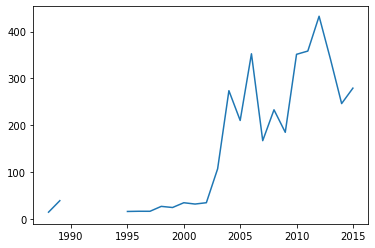

In [221]:
# Early detections were planets around nearby stars
# Later detections found around stars farther away

grouped.agg('mean')['DIST(PARSEC)'].plot()

# GroupBy with Real Data

## Choose your Groups

We'll use the same dataset of beer reviews seen in previous notebooks.

In [222]:
df = pd.read_csv('data/beer2.csv.gz',
                  index_col=0,
                  parse_dates=['time'])

The unique values in the column (in this case, `beer_style`) will make up the **keys** or "group names" in the groupby.

In [223]:
# Example values in the `beer_style` column

df['beer_style'].iloc[0:5]

0                    American Stout
1                   American Porter
2                   German Pilsener
3    American Double / Imperial IPA
4           American Pale Ale (APA)
Name: beer_style, dtype: object

In [224]:
# The unique values in the `beer_style` column will be the keys of our groupby
print( len( df['beer_style'] ) )
print( len( df['beer_style'].unique() ) )

50000
104


## Create GroupBy Object

In [225]:
gr = df.groupby('beer_style')

print( type( gr ) )

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [226]:
# The number of groups matches the number of unique entries in the column

gr.ngroups

104

In [227]:
# Example of those column entries

list(gr.groups)[0:5]

['Altbier',
 'American Adjunct Lager',
 'American Amber / Red Ale',
 'American Amber / Red Lager',
 'American Barleywine']

## Split

In [228]:
# Separating one group from many

df_dunkel = gr.get_group('Dunkelweizen')
df_dunkel.info()

# note the number of rows is much less!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 14 to 49912
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   abv                259 non-null    float64       
 1   beer_id            267 non-null    int64         
 2   brewer_id          267 non-null    int64         
 3   beer_name          267 non-null    object        
 4   beer_style         267 non-null    object        
 5   review_appearance  267 non-null    float64       
 6   review_aroma       267 non-null    float64       
 7   review_overall     267 non-null    float64       
 8   review_palate      267 non-null    float64       
 9   profile_name       267 non-null    object        
 10  review_taste       267 non-null    float64       
 11  text               266 non-null    object        
 12  time               267 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory u

In [229]:
len(df_dunkel)

267

In [230]:
# The ordering of the columsn is not ideal for viewing results...

df_dunkel.head()

,abv,beer_id,brewer_id,...,review_taste,text,time
14,5.2,53130,1114,...,4.0,"A-Very deep, dark brown with a thin tan head ...",2009-10-05 21:42:35
208,5.2,53130,1114,...,3.0,"Pours a very deep, dark chestnut brown which ...",2009-10-06 01:13:42
260,5.8,135,39,...,4.0,A - looks like a polluted hefe(in a good way)...,2009-10-06 01:54:56
292,5.6,2041,703,...,3.5,Poured from a 16.9oz bottle into a US tumbler...,2009-10-06 02:20:52
372,5.4,17140,412,...,3.5,One of the new 500ml swing-top bottles. Pours...,2009-10-06 03:49:21


In [231]:
# For convenient viewing of groupby results
# Rearrange the columns such that the groupby keys are first

cols = ['beer_style'] + df.columns.difference(['beer_style']).tolist()
cols

['beer_style',
 'abv',
 'beer_id',
 'beer_name',
 'brewer_id',
 'profile_name',
 'review_appearance',
 'review_aroma',
 'review_overall',
 'review_palate',
 'review_taste',
 'text',
 'time']

In [232]:
# Another group: Separate the 'Tripel' group from the others

df_tripel = gr.get_group('Tripel')[cols]
df_tripel.head()

,beer_style,abv,beer_id,...,review_taste,text,time
42,Tripel,8.0,1631,...,4.0,"Was perusing a store for some new items, and ...",2009-10-05 22:12:23
79,Tripel,8.5,5426,...,4.0,Appearance: Pours a very cloudy chestnut colo...,2009-10-05 23:02:42
102,Tripel,10.0,2566,...,4.0,Poured a nice slightly cloudy golden yellow w...,2009-10-05 23:31:27
110,Tripel,10.0,2566,...,4.0,Pours hazy amber-orange in color with a massi...,2009-10-05 23:36:42
171,Tripel,9.5,646,...,4.5,Pours a murky slightly orangish gold. Huge pe...,2009-10-06 00:44:18


In [247]:
# Inspet the group

df_tripel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 42 to 49949
Data columns (total 13 columns):
beer_style           809 non-null object
abv                  793 non-null float64
beer_id              809 non-null int64
beer_name            809 non-null object
brewer_id            809 non-null int64
profile_name         809 non-null object
review_appearance    809 non-null float64
review_aroma         809 non-null float64
review_overall       809 non-null float64
review_palate        809 non-null float64
review_taste         809 non-null float64
text                 809 non-null object
time                 809 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 88.5+ KB


In [233]:
# Alternatively, you could extract a "group" using .loc()

df.loc[df.beer_style=='Tripel',cols]

,beer_style,abv,beer_id,...,review_taste,text,time
42,Tripel,8.0,1631,...,4.0,"Was perusing a store for some new items, and ...",2009-10-05 22:12:23
79,Tripel,8.5,5426,...,4.0,Appearance: Pours a very cloudy chestnut colo...,2009-10-05 23:02:42
102,Tripel,10.0,2566,...,4.0,Poured a nice slightly cloudy golden yellow w...,2009-10-05 23:31:27
...,...,...,...,...,...,...,...
49882,Tripel,8.0,1631,...,4.0,"Pours a golden amber, with a big head that st...",2009-12-25 05:02:03
49945,Tripel,7.8,1054,...,3.5,A- It's pretty. Nice golden yellow. Nice and ...,2009-12-25 08:41:01
49949,Tripel,8.0,658,...,3.5,From a 750 ml caged and corked brown bottle. ...,2009-12-25 09:39:25


## Apply

In the **split-apply-combine** strategy, during the apply step, one often aggregates across a group

In [234]:
type(gr)

pandas.core.groupby.generic.DataFrameGroupBy

In [235]:
# Aggregation methods apply to each group separately.

gr.agg('mean')

,abv,beer_id,brewer_id,...,review_overall,review_palate,review_taste
beer_style,,,,,,,
Altbier,5.936331,28241.698324,4724.486034,...,3.790503,3.689944,3.703911
American Adjunct Lager,4.880552,9403.638070,1541.485255,...,3.071716,2.733244,2.674933
American Amber / Red Ale,6.135963,23557.469145,3314.523420,...,3.833829,3.694796,3.734944
...,...,...,...,...,...,...,...
Wheatwine,10.766667,44146.641618,2363.132948,...,3.722543,3.872832,3.947977
Winter Warmer,6.520407,22726.750603,2315.001609,...,3.805310,3.703540,3.767900
Witbier,5.850545,29447.023904,3096.407703,...,3.742364,3.567729,3.624170


This says apply the `mean` function to each column. 
Non-numeric columns (nuisance columns) are excluded.

We can also select a subset of columns to perform the aggregation on.

In [236]:
# Apply aggregation method only to a subset of columns

review_columns = ['abv','review_overall','review_appearance',
                  'review_palate','review_taste']
gr[review_columns].agg('mean')

,abv,review_overall,review_appearance,review_palate,review_taste
beer_style,,,,,
Altbier,5.936331,3.790503,3.776536,3.689944,3.703911
American Adjunct Lager,4.880552,3.071716,2.783512,2.733244,2.674933
American Amber / Red Ale,6.135963,3.833829,3.836431,3.694796,3.734944
...,...,...,...,...,...
Wheatwine,10.766667,3.722543,3.916185,3.872832,3.947977
Winter Warmer,6.520407,3.805310,3.864441,3.703540,3.767900
Witbier,5.850545,3.742364,3.634794,3.567729,3.624170


The `.` attribute lookup works as well.

In [237]:
gr.abv.agg('mean')

beer_style
Altbier                      5.936331
American Adjunct Lager       4.880552
American Amber / Red Ale     6.135963
                              ...    
Wheatwine                   10.766667
Winter Warmer                6.520407
Witbier                      5.850545
Name: abv, Length: 104, dtype: float64

Find the `beer_style` with the greatest variance in `abv`.

In [238]:
# ex: groupby, then select abv, then aggregrate with std, then sort

(df
   .groupby('beer_style')
   .abv
   .std()
   .sort_values(ascending=False)
 )

beer_style
American Strong Ale                 3.506721
American Double / Imperial Stout    2.785742
Flanders Oud Bruin                  2.723145
                                      ...   
Gose                                0.185557
Low Alcohol Beer                    0.121006
Happoshu                            0.000000
Name: abv, Length: 104, dtype: float64

Note: the pattern used above is a common idiom in Pandas: a string of `.method()` calls.

Multiple Aggregations on one column

In [239]:
gr['review_aroma'].agg([np.mean, np.std, 'count'])

,mean,std,count
beer_style,,,
Altbier,3.581006,0.561276,179
American Adjunct Lager,2.479893,0.732925,746
American Amber / Red Ale,3.653532,0.588231,1345
...,...,...,...
Wheatwine,3.942197,0.484780,173
Winter Warmer,3.738938,0.579463,1243
Witbier,3.619522,0.589968,753


Single Aggregation on multiple columns

In [241]:
gr[review_columns].mean()

,abv,review_overall,review_appearance,review_palate,review_taste
beer_style,,,,,
Altbier,5.936331,3.790503,3.776536,3.689944,3.703911
American Adjunct Lager,4.880552,3.071716,2.783512,2.733244,2.674933
American Amber / Red Ale,6.135963,3.833829,3.836431,3.694796,3.734944
...,...,...,...,...,...
Wheatwine,10.766667,3.722543,3.916185,3.872832,3.947977
Winter Warmer,6.520407,3.805310,3.864441,3.703540,3.767900
Witbier,5.850545,3.742364,3.634794,3.567729,3.624170


Multiple aggregations on multiple columns

In [242]:
result = gr[review_columns].agg(['mean', 'count', 'std'])
result.columns.names=['characteristic','measure']
result

characteristic                  abv                  ... review_taste        \
measure                        mean count       std  ...         mean count   
beer_style                                           ...                      
Altbier                    5.936331   169  1.394085  ...     3.703911   179   
American Adjunct Lager     4.880552   706  0.405311  ...     2.674933   746   
American Amber / Red Ale   6.135963  1256  1.299676  ...     3.734944  1345   
...                             ...   ...       ...  ...          ...   ...   
Wheatwine                 10.766667   171  1.043411  ...     3.947977   173   
Winter Warmer              6.520407  1228  1.079628  ...     3.767900  1243   
Witbier                    5.850545   716  1.561416  ...     3.624170   753   

characteristic                      
measure                        std  
beer_style                          
Altbier                   0.608033  
American Adjunct Lager    0.815884  
American Amber / Red Ale  0.640439  
...                            ...  
Wheatwine                 0.624275  
Winter Warmer             0.621533  
Witbier                   0.674517  

[104 rows x 15 columns]

## Transform

Combined Series / DataFrame is the same shape as the input. 

Example: standardize the reviews by subtracting the mean.

In [243]:
# Define a function to perform the demeaning

def de_mean(reviews):
    s = reviews - reviews.mean()
    return s

In [244]:
# Demonstrate the demeaning function acting on a Series

de_mean(df.review_overall)

0        0.65018
1        0.65018
2       -0.84982
          ...   
49997    1.15018
49998    0.15018
49999    1.15018
Name: review_overall, Length: 50000, dtype: float64

In [245]:
# Use transform() to apply the demean function to grouped data

df.groupby('profile_name').transform(de_mean)

,abv,beer_id,brewer_id,...,review_palate,review_taste,time
0,-2.763000,-14386.800000,-250.800000,...,-0.100000,0.450000,-1 days +12:10:11.900000
1,-1.501563,-12613.333333,3168.025641,...,0.038462,-0.012821,-34 days +01:54:53.974358
2,-2.072727,-10567.348485,805.833333,...,-0.568182,-0.287879,-34 days +23:54:09.666667
...,...,...,...,...,...,...,...
49997,0.400000,4817.388889,1236.833333,...,0.777778,0.555556,40 days 00:58:02.888888
49998,-1.625862,-36774.032258,-4302.516129,...,-0.838710,-0.774194,47 days 23:03:03.193548
49999,2.165500,20759.950000,12161.450000,...,0.575000,0.375000,36 days 16:53:37.250000


Performance: Often, it is better to work with the groupby object directly

In [246]:
# Rather than applying the de_mean(), 
# use the built-in pandas method mean() and 
# move the arithmetic up to "df - df.groupby()"

(

    df - df.groupby('profile_name').transform('mean')

).select_dtypes(exclude=['object'])

,abv,beer_id,beer_name,...,review_taste,text,time
0,-2.763000,-14386.800000,NaN,...,0.450000,NaN,-1 days +12:10:11.900000
1,-1.501563,-12613.333333,NaN,...,-0.012821,NaN,-34 days +01:54:53.974358
2,-2.072727,-10567.348485,NaN,...,-0.287879,NaN,-34 days +23:54:09.666667
...,...,...,...,...,...,...,...
49997,0.400000,4817.388889,NaN,...,0.555556,NaN,40 days 00:58:02.888888
49998,-1.625862,-36774.032258,NaN,...,-0.774194,NaN,47 days 23:03:03.193548
49999,2.165500,20759.950000,NaN,...,0.375000,NaN,36 days 16:53:37.250000


In [247]:
%timeit df.groupby('profile_name').transform(de_mean)

13.2 s ± 733 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [248]:
%timeit (df-df.groupby('profile_name').transform('mean')).select_dtypes(exclude=['object'])

8.88 s ± 293 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [263]:
df.groupby('profile_name').ngroups

4124

***

# GroupBy with Multiple Columns

You can group by **levels** of a MultiIndex.